# <font color='#3d59c6'> MD004 ENTREGA FINAL </font>

### <font color='#3d59c6'> PARTE I </font>

Imaginemos que trabajas en una empresa de análisis de datos para una compañía de transporte público que opera una flota de autobuses en Barcelona. Debes desarrollar un modelo predictivo para estimar el consumo de combustible de los autobuses en función de diferentes variables. Dispones de un conjunto de datos que incluye 35 variables explicativas (31 continuas y 4 categóricas)

El dataset que te hacen llegar contiene información recopilada de sensores instalados en los autobuses, así como datos operativos y ambientales. A continuación, se presenta un ejemplo de las variables presentes en el conjunto de datos

Ejemplo variables continuas:

- Distancia recorrida desde el último repostaje (en kilómetros)
- Velocidad media del autobús durante el trayecto (en kilómetros por hora)
- Carga promedio de pasajeros a bordo
- Temperatura exterior durante el trayecto (en grados Celsius)
- Año de fabricación del autobús

Variables categóricas:

- Tipo de motor del autobús (convencional, eléctrico, híbrido)
- Ruta del autobús (urbana, interurbana)
- Tramo de la semana (fin_de_semana, no_fin_de_semana)
- Condiciones climáticas (soleado, nublado, lluvioso, nevado)

¿Podrías describir que estrategia seguirías para desarrollar un modelo predictivo utilizando este conjunto de datos?
(solo menciona pasos y técnicas) (2pts)

En primer lugar, se debería de realizar una limpieza y un analisis descriptivo de los datos, para entender los datos, ver si estamos cumpliendo los diferentes supuestos de normalidad y homocedasticidad con los datos, ya que si no los estamos cumpliendo en primera instancia puede ser que no se haya hecho una buena recopilación de los datos, o que simplemnte necesitemos más datos para tener un muestra lo suficientemente grande. 

En segundo lugar, se analizarian las diferentes variables categoricas y su impacto dentro del dataset, seguramente al tratarse sobre el consumo, tendremos variables como el tipo de motor o la ruta que serán claves. 
Así pues, se visualizarian y seleccionarian a traves de un análisis de pca las variables numéricas más importantes y que más correlación tengan con nuestra variable consumo, para después,realizar analisis de two-way anova con las categoricas más importantes, previamente seleccionadas con información mutua y así ver si el hecho de tener diferentes categorías esto afecta al consumo o no. 

Por último, como seguramente sea un sí, se tendrían que realizar diferentes modelos de regresión lineal para cada escenario que presente ese autobus. Ya que para cada escenario seguramente tengamos una pendiente. Es cierto que se podría englobar todo en el mismo, pero estaríamos perdiendo precisión, por lo tanto, en función de la criticidad y de lo precisos que queramos ser, se deberá de aplicar una táctica u otra.

### <font color='#3d59c6'> PARTE II </font>

Se dispone del siguiente dataset que contiene datos cualitativos y cuantitativos de clientes de una empresa de telecomuniaciones india en la que se detallan aspectos de los clientes de la empresa. El objetivo del presente dataset es encontrar acciones concretas que nos ayuden a prevenir que un cliente haga churn:

- device user’s – device brand (Categorical)
- first_payment_amount  – user’s first payment amount(Numeric)
- age  – user’s age(Numeric or categorical?)
- city  – user’s city(Categorical)
- number_of_cards  – #of cards user owns
- payments_initiated  – #of payments initiated by user
- payments_failed  – #of payments failed
- payments_completed – #of payments completed
- payments_completed_amount_first_7days  – amt of payment completed in first 7 days of joining
- reward_purchase_count_first_7days – #of rewards claimed in first 7 days
- coins_redeemed_first_7days – coins redeemed in first 7 days 
- is_referral – is user a referred user
- visits_feature_1  – #of visits made by user to product feature 1
- visits_feature_2 – #of visits made by user to product feature 2
- given_permission_1 – has user given permission 1
- given_permission_2 – has user given permission 2
- user_id – user identifier
- is_churned – whether user churned


###### Data: 
MD004_ACFinal_customer_churn_data.csv

###### Se pide:

- **Análisis exploratorio de los datos(2pts)**
    - análisis descriptivo de la variable objetivo (métricas+gráficos) comentando los resultados
    - visualizaciones que ayuden a entender la relación entre los atributos y la variable objetivo is_churned (métricas+gráficos) comentando los resultados

- **Selección de variables, mediante el uso de técnicas estadísticas (usad al menos 2: Correlación, PCA, ANOVA, Información Mútua), para el desarrollo de un modelo de regresión lógistica (2p)**
    - justificad la elección de vuestras variables e interpretad los resultados de las técnicas usadas

- **Desarrollo del modelo de regresión logística (3p)**
    - Selección y justificación de la métrica de optimización del modelo
    - Desarrollo de al menos 2 modelos y comparación de resultados (Matriz de confusión)
    
- **Conclusiones y vías abiertas (1p)** ¿Qué recomendaciones le daríais a esta empresa para reducir churn?, ¿Cómo os ayuda el modelo que habéis calculado a llegar a estas conclusiones?

Recordad: este ejercicio no tiene una solución única. Muchas opciones pueden ser válidas, pero se espera que se haga una interpretación de los datos obtenidos en todos los puntos pero **sobre todo que seáis capaces de sacar recomendaciones concretas que ayuden a reducir el customer churn.**

## <font color='#3d59c6'>  ANALISIS EXPLORATORIO DE LOS DATOS </font>

In [103]:
library(tidyverse)
library(FSelectorRcpp)
library(caret)
library(ggplot2)
library(GGally)
library(gridExtra)
library(olsrr)
library(tidyverse)
library(caret)
library(lmtest)
library(gridExtra)
library(broom)
library(dplyr)
library(corrplot)
library(rlang)
library(e1071)
library(tm)
library(SnowballC)
library(wordcloud)
library(gmodels)

In [104]:
data = read.csv(file='MD004_ACFinal_customer_churn_data.csv', header=TRUE, sep=',', dec='.')

In [105]:
head(data)#de forma predefinida retorna las primeras 6 observations
tail(data)#de forma predefinida retorna las últimas 6 observations
#observamos el tipo de datos, cuantos registros tiene el dataset y cuantas variables
str(data)
summary(data)
na_counts_per_column <- colSums(is.na(data))
print(na_counts_per_column)

,device,first_payment_amount,age,city,number_of_cards,payments_initiated,payments_failed,payments_completed,payments_completed_amount_first_7days,reward_purchase_count_first_7days,coins_redeemed_first_7days,is_referral,visits_feature_1,visits_feature_2,given_permission_1,given_permission_2,user_id,is_churned
,<chr>,<int>,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<lgl>,<int>,<int>,<int>,<int>,<int>,<int>
1,samsung,0,20,Ahmedabad,2,1,0,1,0,NA,0,FALSE,3,0,1,0,269438,0
2,xiaomi,0,20,Surat,1,1,0,1,0,NA,0,TRUE,0,0,1,0,139521,0
3,xiaomi,0,20,Kullu,1,2,1,1,0,0,0,TRUE,0,0,0,1,307352,0
4,oneplus,0,20,Mumbai,2,4,1,2,322,2,20,FALSE,0,0,1,1,456424,0
5,apple,0,20,Pune,2,1,0,1,0,0,0,FALSE,0,1,1,1,398779,0
6,oppo,0,20,Ahmedabad,0,1,0,1,0,0,0,TRUE,0,0,1,1,136656,0


,device,first_payment_amount,age,city,number_of_cards,payments_initiated,payments_failed,payments_completed,payments_completed_amount_first_7days,reward_purchase_count_first_7days,coins_redeemed_first_7days,is_referral,visits_feature_1,visits_feature_2,given_permission_1,given_permission_2,user_id,is_churned
,<chr>,<int>,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<lgl>,<int>,<int>,<int>,<int>,<int>,<int>
104138,samsung,53,NA,Bangalore,1,2,0,2,63,3,23,FALSE,0,1,1,1,4833,1
104139,samsung,55,NA,Ongole,0,3,1,2,56,2,20,TRUE,0,0,1,0,30036,1
104140,vivo,67,NA,Chennai,1,1,0,1,67,2,53,TRUE,0,0,1,0,377399,1
104141,apple,67,NA,Bangalore,3,2,0,2,137,NA,0,FALSE,0,0,1,1,8415,1
104142,samsung,83,NA,Hyderabad,5,3,1,2,211,5,140,FALSE,0,0,0,1,8056,1
104143,oneplus,437,NA,Hyderabad,1,1,0,1,437,0,0,FALSE,0,0,1,1,109558,1


'data.frame':	104143 obs. of  18 variables:
 $ device                               : chr  "samsung" "xiaomi" "xiaomi" "oneplus" ...
 $ first_payment_amount                 : int  0 0 0 0 0 0 0 0 0 0 ...
 $ age                                  : int  20 20 20 20 20 20 20 20 20 20 ...
 $ city                                 : chr  "Ahmedabad" "Surat" "Kullu" "Mumbai" ...
 $ number_of_cards                      : int  2 1 1 2 2 0 0 0 0 0 ...
 $ payments_initiated                   : int  1 1 2 4 1 1 1 17 1 1 ...
 $ payments_failed                      : int  0 0 1 1 0 0 0 0 0 0 ...
 $ payments_completed                   : int  1 1 1 2 1 1 1 12 1 1 ...
 $ payments_completed_amount_first_7days: int  0 0 0 322 0 0 0 143 0 0 ...
 $ reward_purchase_count_first_7days    : int  NA NA 0 2 0 0 0 6 0 NA ...
 $ coins_redeemed_first_7days           : int  0 0 0 20 0 0 0 190 0 0 ...
 $ is_referral                          : logi  FALSE TRUE TRUE FALSE FALSE TRUE ...
 $ visits_feature_1              

    device          first_payment_amount      age            city          
 Length:104143      Min.   :   0.00      Min.   :20.00   Length:104143     
 Class :character   1st Qu.:   2.00      1st Qu.:27.00   Class :character  
 Mode  :character   Median :  12.00      Median :31.00   Mode  :character  
                    Mean   :  34.77      Mean   :32.69                     
                    3rd Qu.:  37.00      3rd Qu.:36.00                     
                    Max.   :4370.00      Max.   :80.00                     
                                         NA's   :142                       
 number_of_cards  payments_initiated payments_failed   payments_completed
 Min.   : 0.000   Min.   :  1.000    Min.   : 0.0000   Min.   :  1.000   
 1st Qu.: 1.000   1st Qu.:  1.000    1st Qu.: 0.0000   1st Qu.:  1.000   
 Median : 1.000   Median :  2.000    Median : 0.0000   Median :  1.000   
 Mean   : 1.989   Mean   :  2.847    Mean   : 0.4399   Mean   :  1.831   
 3rd Qu.: 3.000   3rd 

                               device                  first_payment_amount 
                                    0                                     0 
                                  age                                  city 
                                  142                                     0 
                      number_of_cards                    payments_initiated 
                                  472                                   472 
                      payments_failed                    payments_completed 
                                  472                                   472 
payments_completed_amount_first_7days     reward_purchase_count_first_7days 
                                  472                                 23264 
           coins_redeemed_first_7days                           is_referral 
                                  472                                     0 
                     visits_feature_1                      visits_feature_2 

Vemos que tenemos nulos, pero antes de eliminarlos, vamos a analizar las correlaciones con las variables númericas, ya que R nos permite hacer esta correlación aunque haya nulos, de esta manera podremos evaluar si de las variables númericas que contienen nulos hay variables que son relevantes o no.

In [106]:
data_numeric = data %>%
  select_if(is.numeric)

In [107]:
na_counts_per_column <- colSums(is.na(data_numeric))
print(na_counts_per_column)

                 first_payment_amount                                   age 
                                    0                                   142 
                      number_of_cards                    payments_initiated 
                                  472                                   472 
                      payments_failed                    payments_completed 
                                  472                                   472 
payments_completed_amount_first_7days     reward_purchase_count_first_7days 
                                  472                                 23264 
           coins_redeemed_first_7days                      visits_feature_1 
                                  472                                  2646 
                     visits_feature_2                    given_permission_1 
                                 2646                                     0 
                   given_permission_2                               user_id 

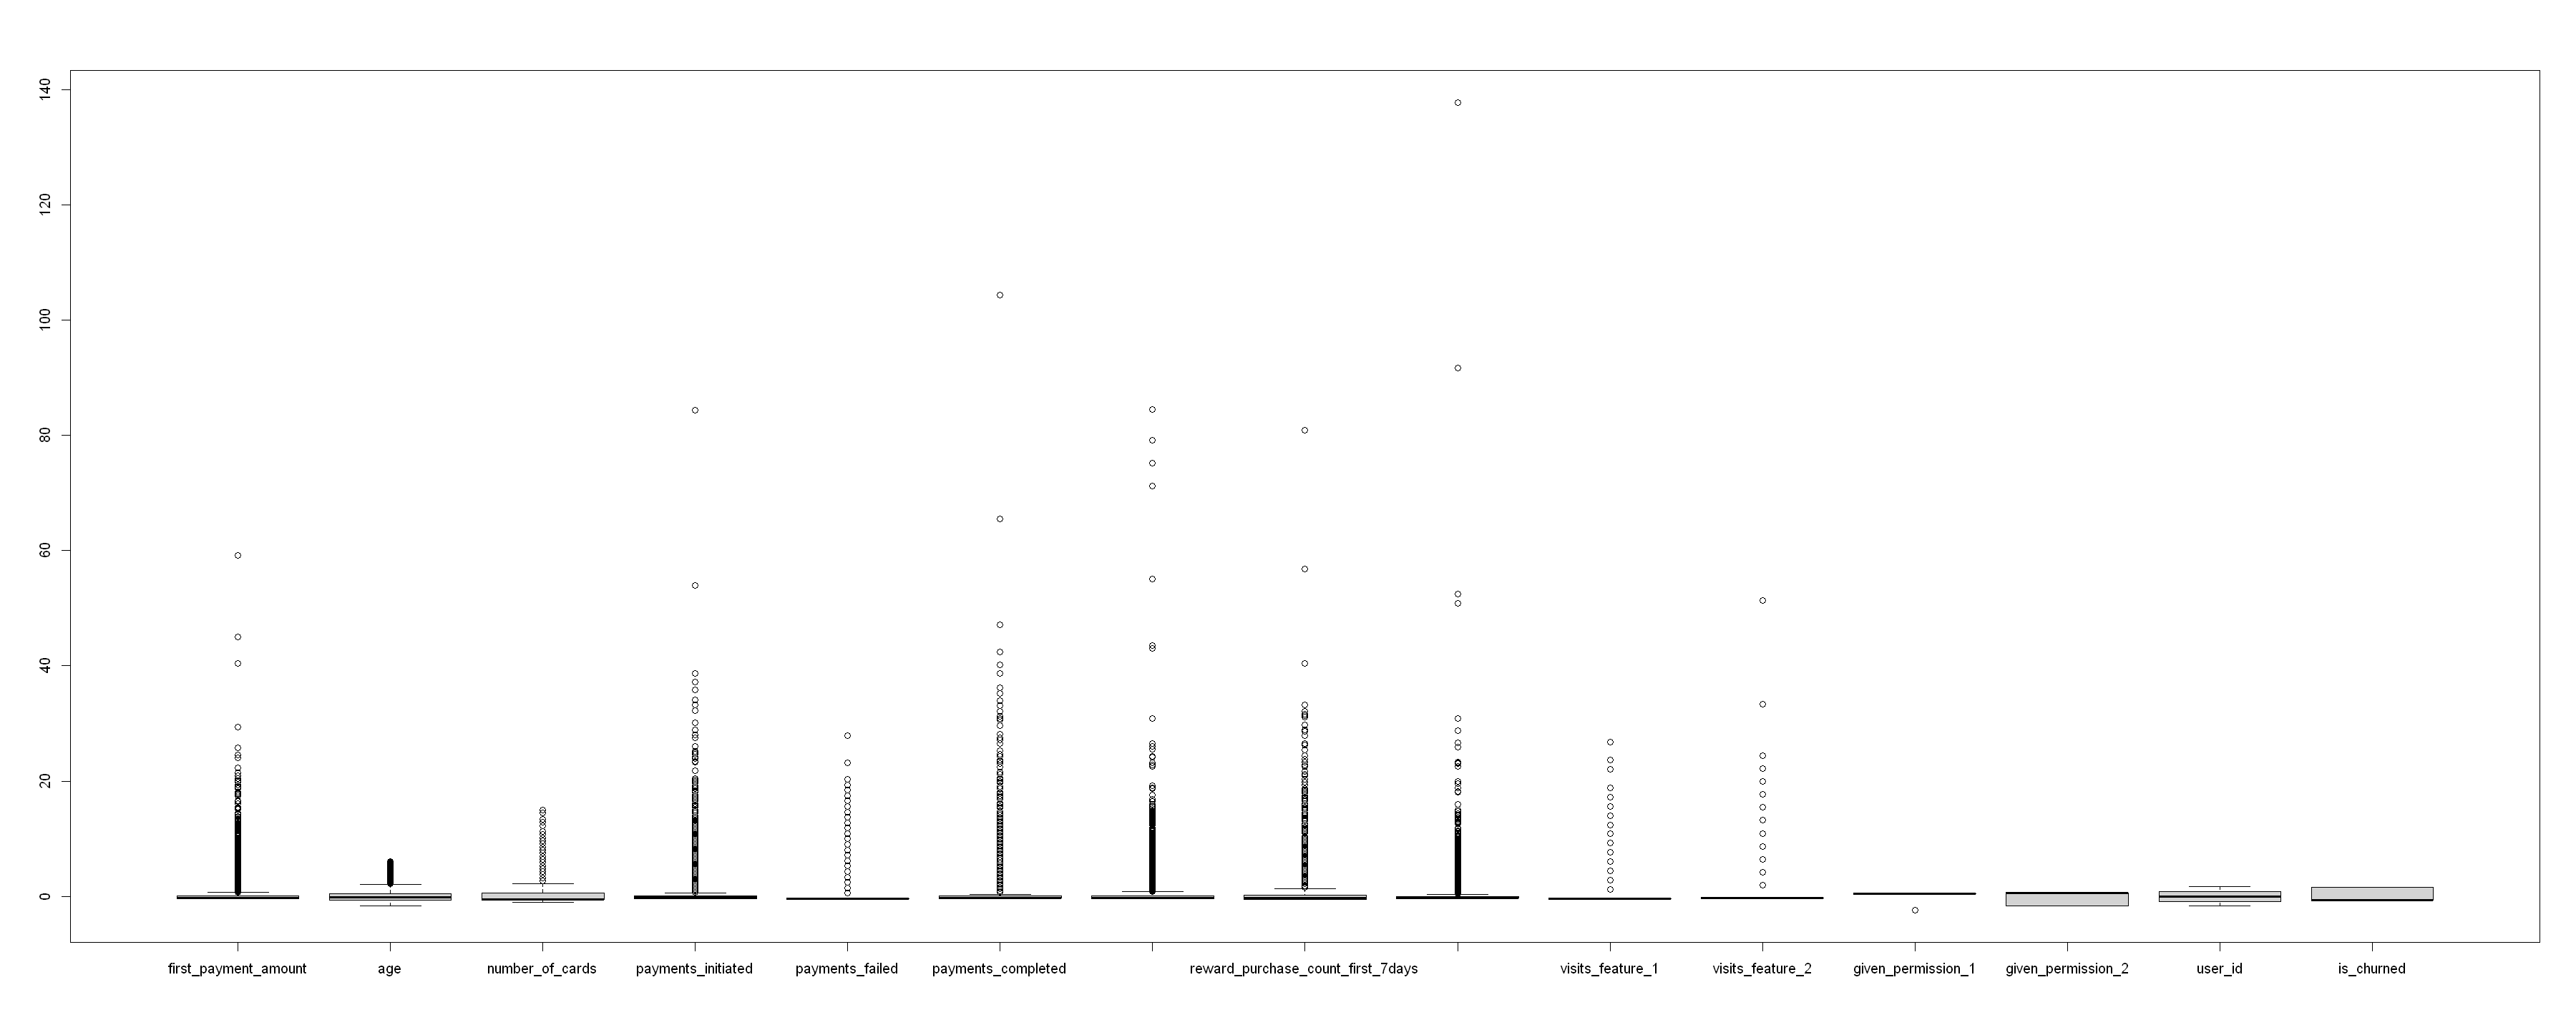

In [108]:
df_standard  <- as.data.frame(lapply(data_numeric, scale))
options(
  repr.plot.width = 30,  
  repr.plot.height = 12  
)
boxplot(df_standard)

Vemos como tenemos muhcísimos outliers en los datos

In [109]:
summary(data_numeric)

 first_payment_amount      age        number_of_cards  payments_initiated
 Min.   :   0.00      Min.   :20.00   Min.   : 0.000   Min.   :  1.000   
 1st Qu.:   2.00      1st Qu.:27.00   1st Qu.: 1.000   1st Qu.:  1.000   
 Median :  12.00      Median :31.00   Median : 1.000   Median :  2.000   
 Mean   :  34.77      Mean   :32.69   Mean   : 1.989   Mean   :  2.847   
 3rd Qu.:  37.00      3rd Qu.:36.00   3rd Qu.: 3.000   3rd Qu.:  3.000   
 Max.   :4370.00      Max.   :80.00   Max.   :30.000   Max.   :359.000   
                      NA's   :142     NA's   :472      NA's   :472       
 payments_failed   payments_completed payments_completed_amount_first_7days
 Min.   : 0.0000   Min.   :  1.000    Min.   :    0.00                     
 1st Qu.: 0.0000   1st Qu.:  1.000    1st Qu.:    3.00                     
 Median : 0.0000   Median :  1.000    Median :   21.00                     
 Mean   : 0.4399   Mean   :  1.831    Mean   :   55.97                     
 3rd Qu.: 0.0000   3rd Qu.: 

Verificamos como todos los outliers son debidos a casos específicos, vamos a ver si tenemos el dataset equilibrado

In [110]:
table(data_numeric$is_churned)


    0     1 
74274 29869 

Vemos que en absoluto esta equilibrado.

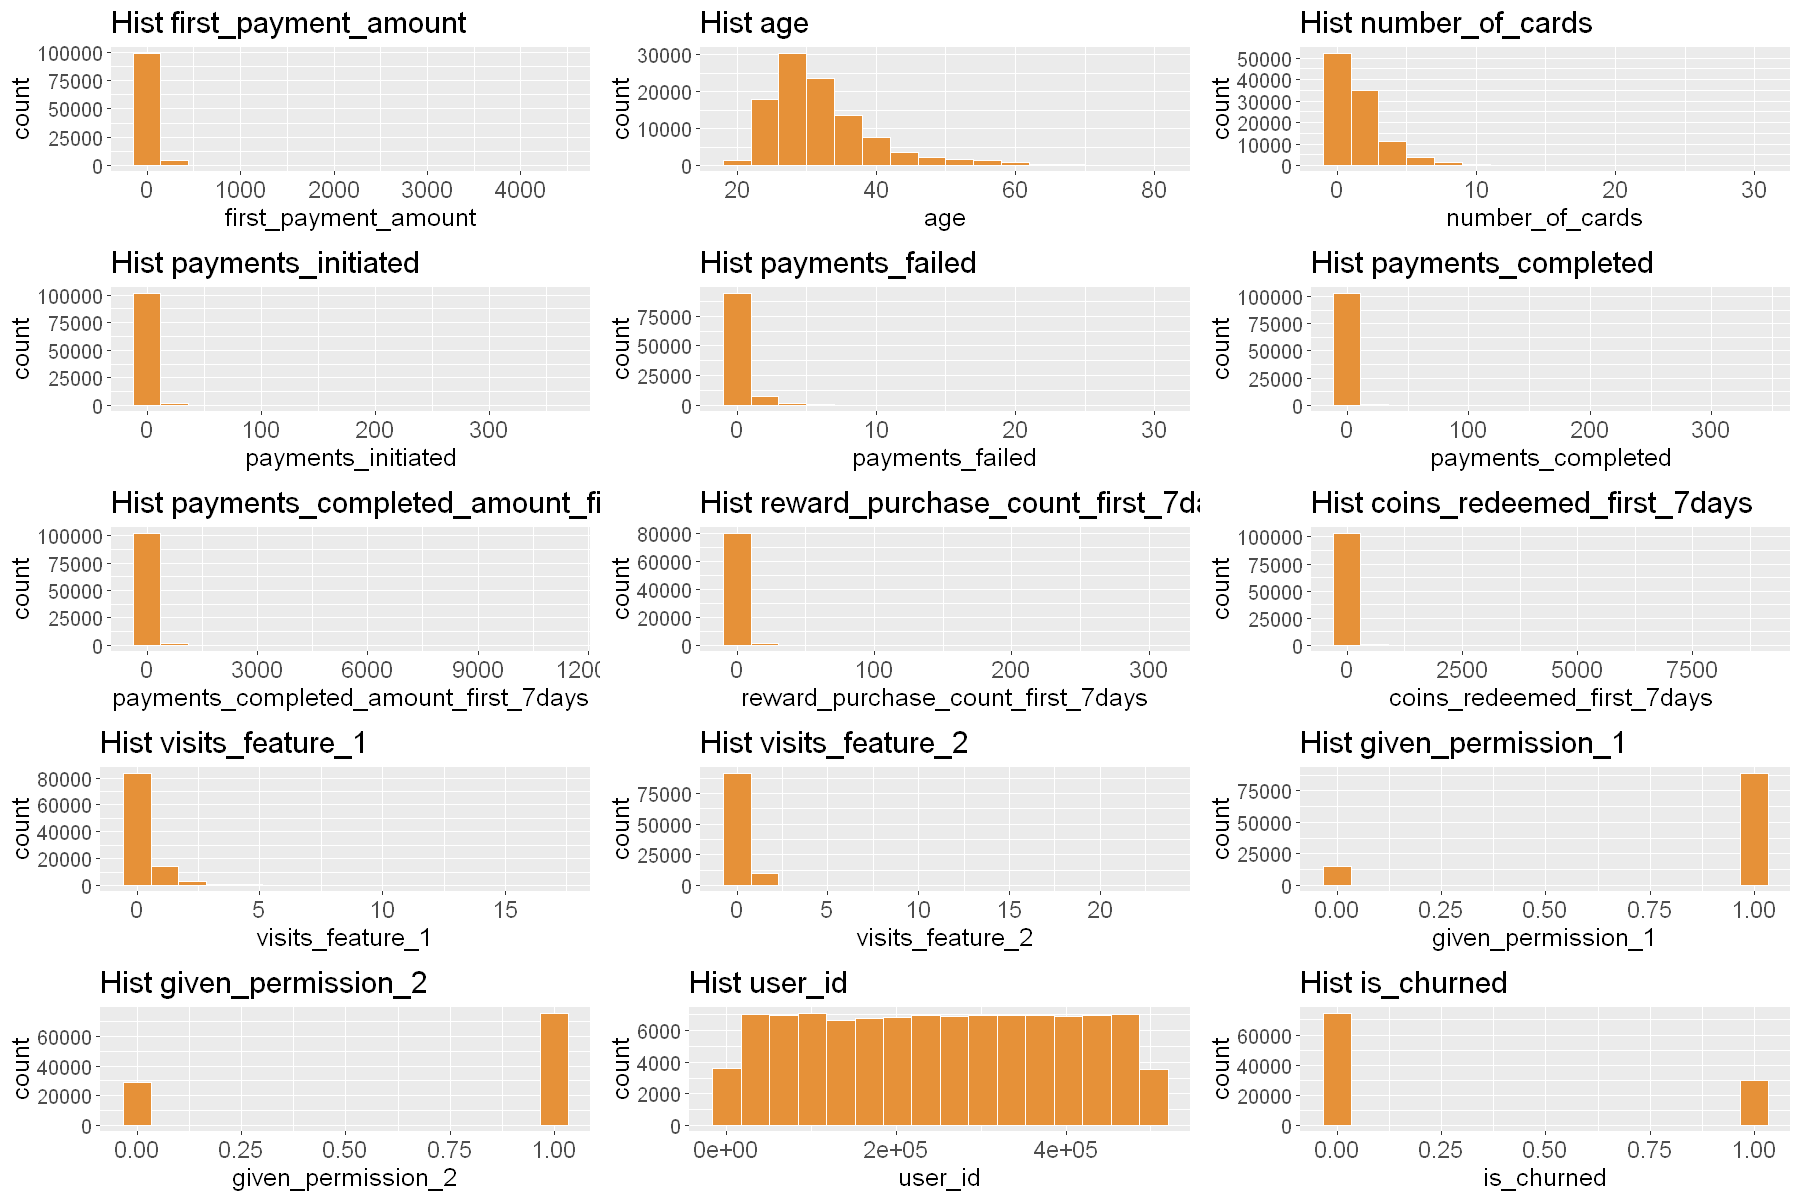

In [111]:
graficos_histograma = list()
var_data = colnames(data_numeric)

for (variable in var_data) {

  grafico = ggplot(data_numeric) +
    aes_string(x = variable) +
    geom_histogram(bins = 16, fill = '#e69138', color = 'white', na.rm = TRUE) +
    theme(text = element_text(size = 15), axis.text.x = element_text(size = 14)) + 
    labs(title = paste('Hist', variable))
  

  graficos_histograma[[length(graficos_histograma) + 1]] = grafico
}

options(
  repr.plot.width = 15,  
  repr.plot.height = 10  
)

# Mostrar los histogramas en un grid
do.call('grid.arrange', c(graficos_histograma, ncol = 3))

vemos como tenemos variables que sus datos se concentran en 0, así pués lo que haremmos primero es analizar las correlaciones y después en función de estas limpiar más el datsaet.


In [112]:
#Generamos datasets filtrando por la clase
data_0 = data_numeric[data_numeric$is_churned == 0,]
data_1 = data_numeric[data_numeric$is_churned == 1,]

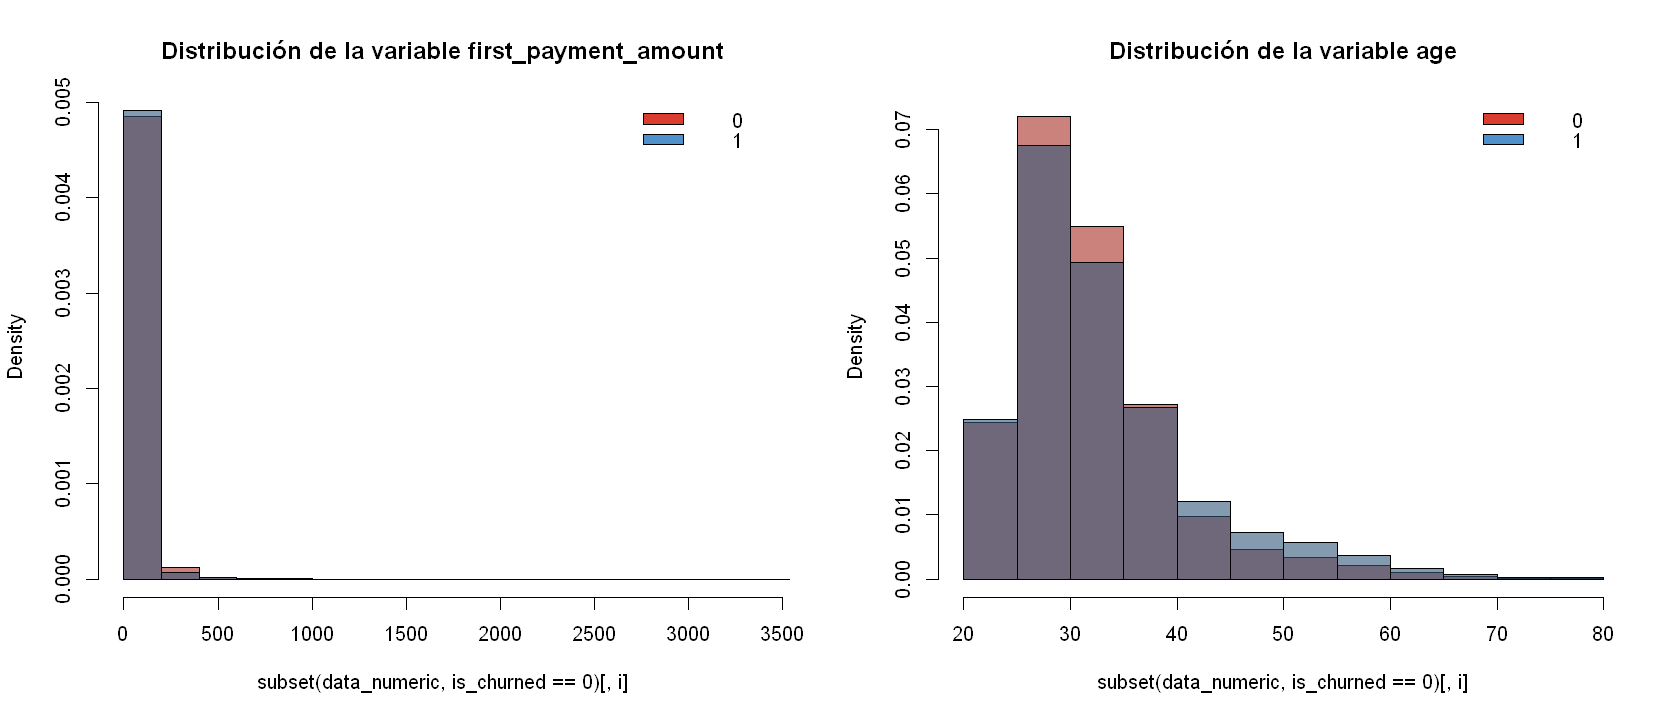

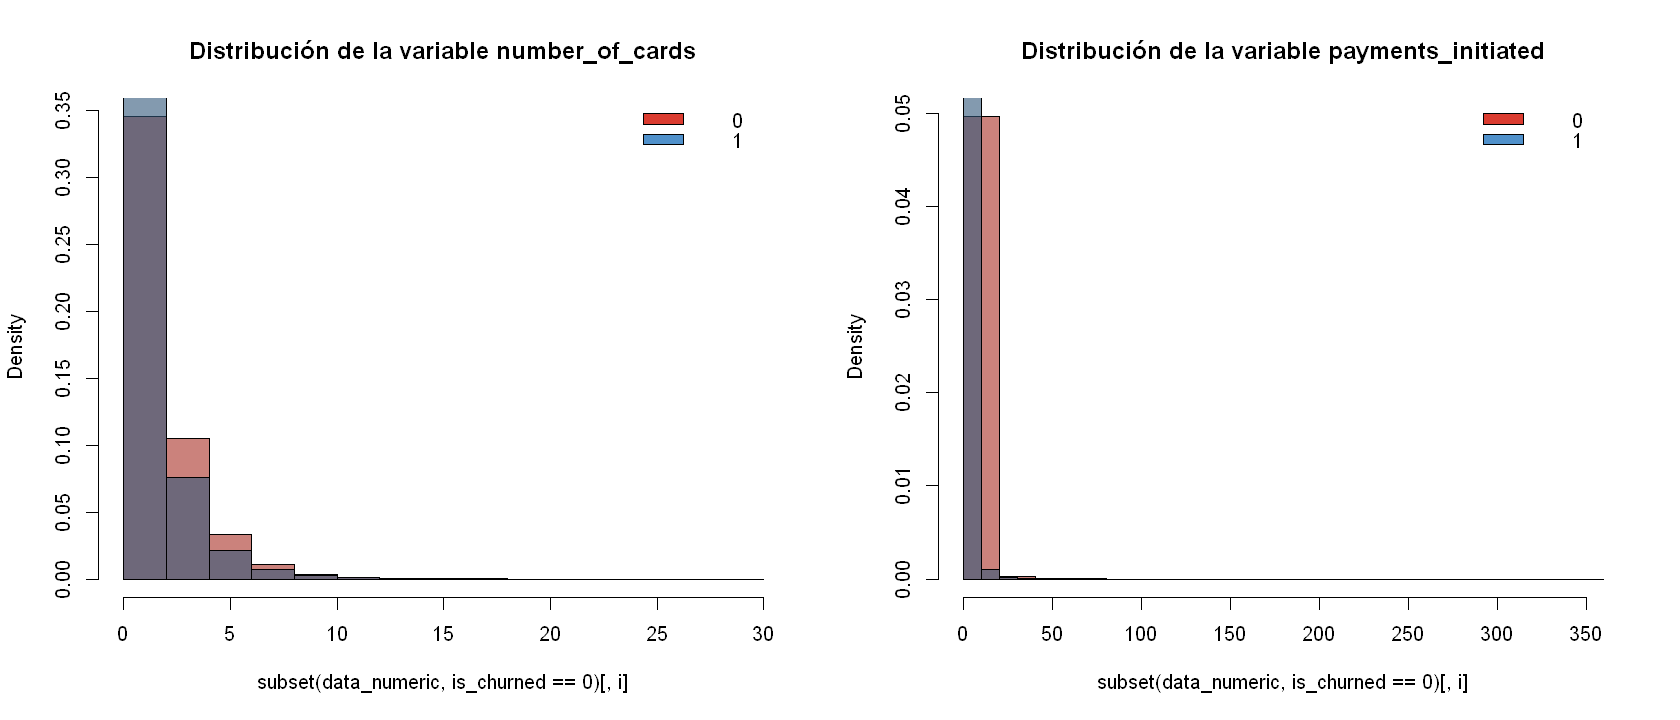

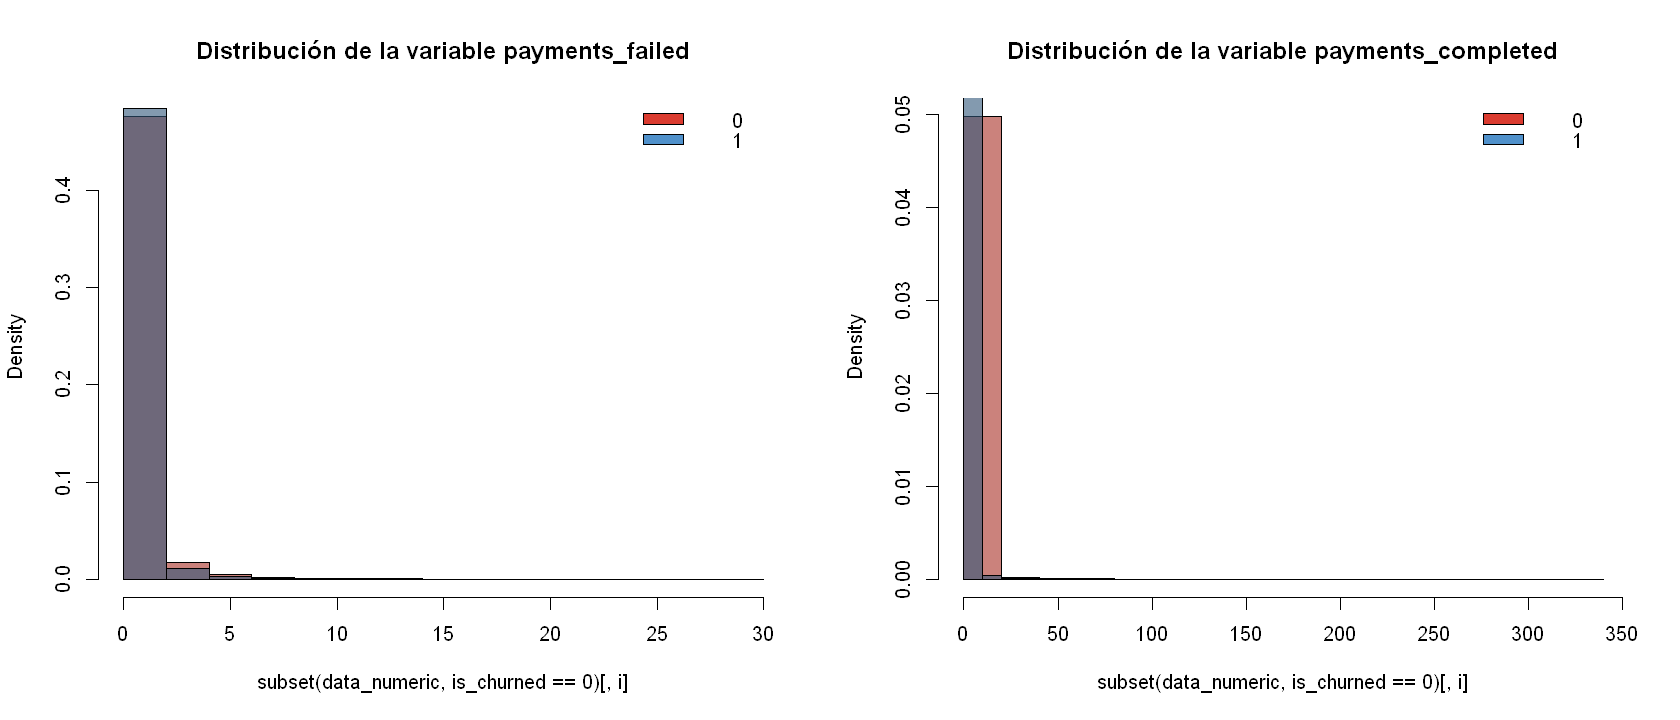

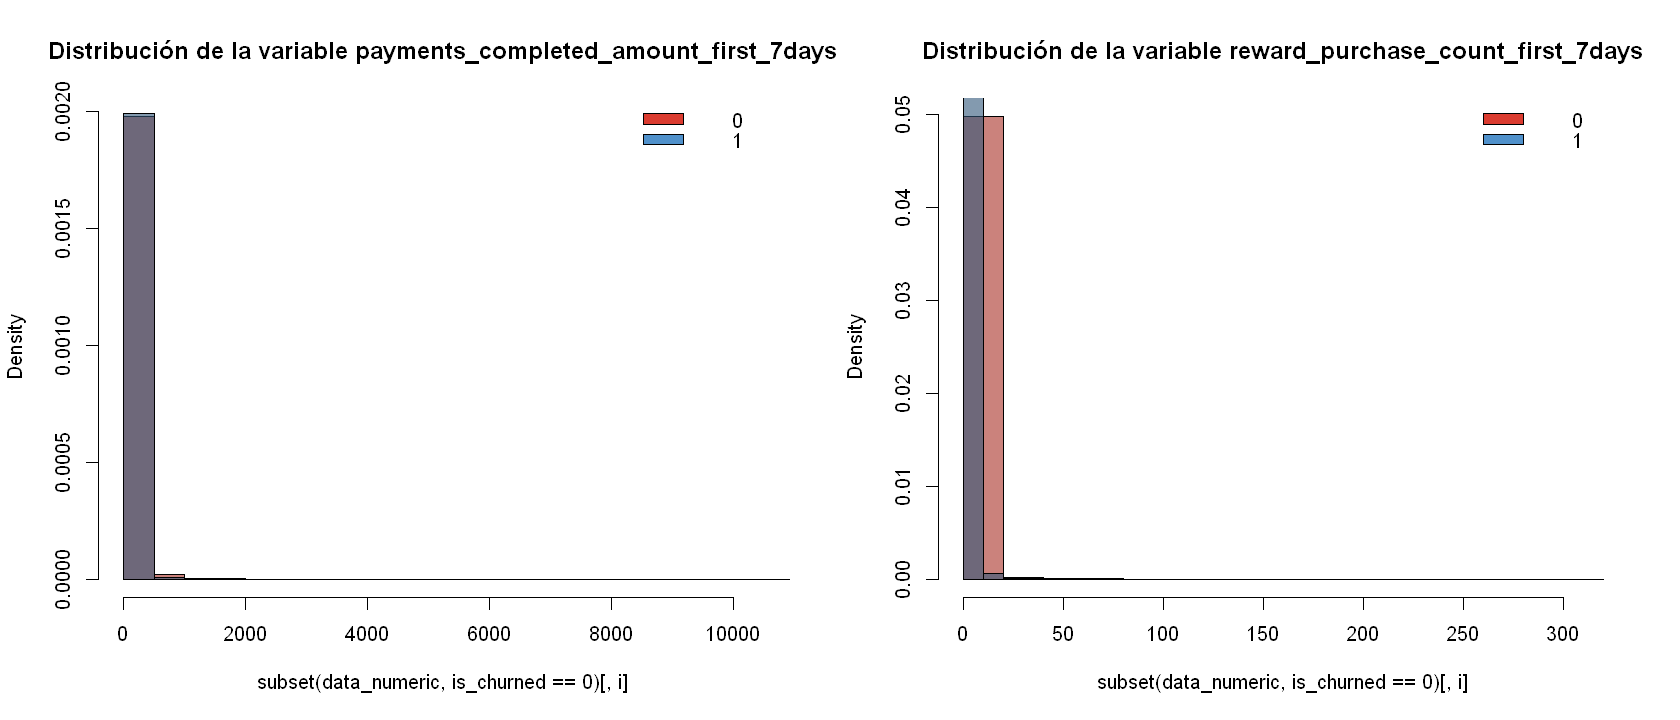

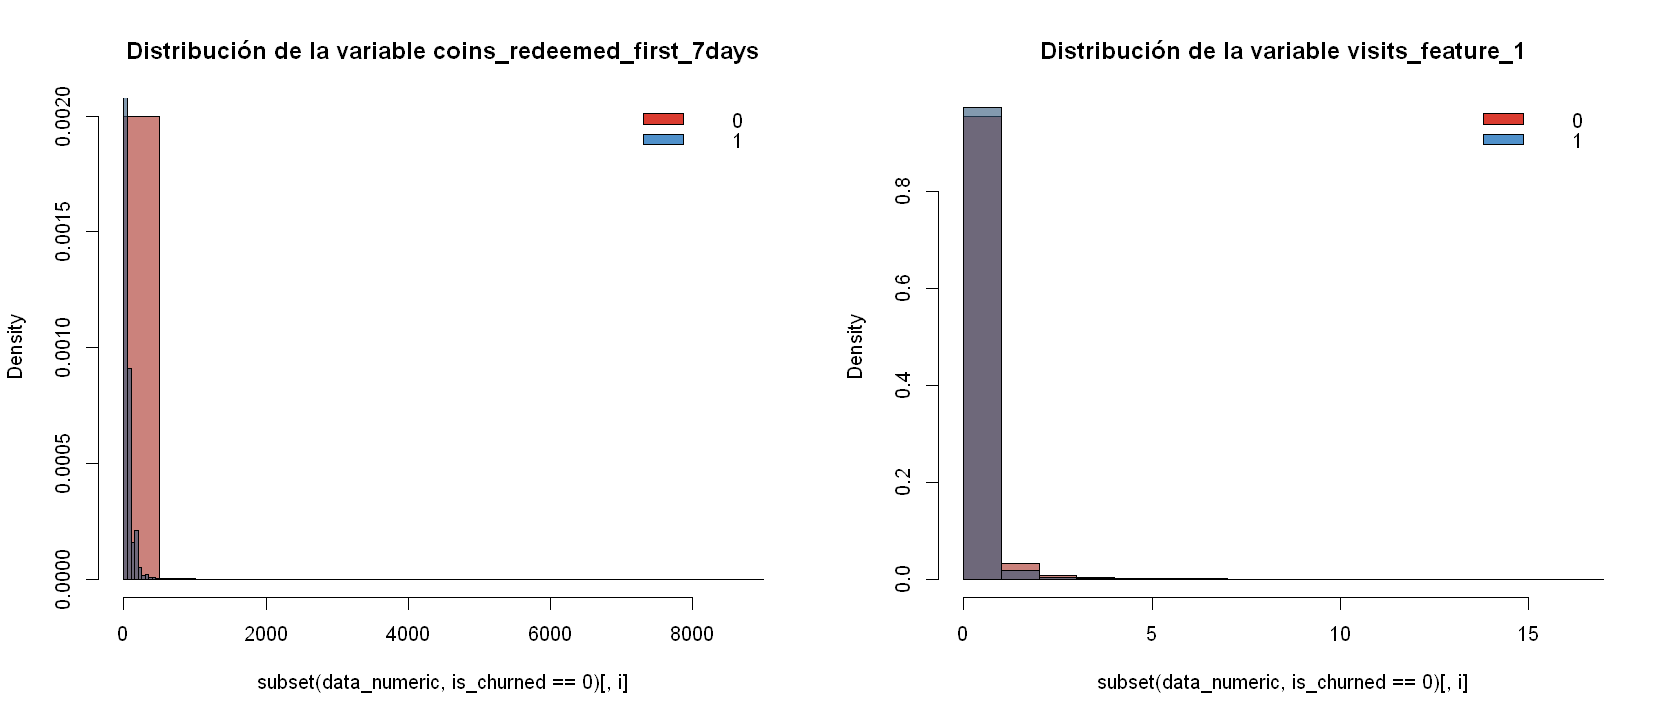

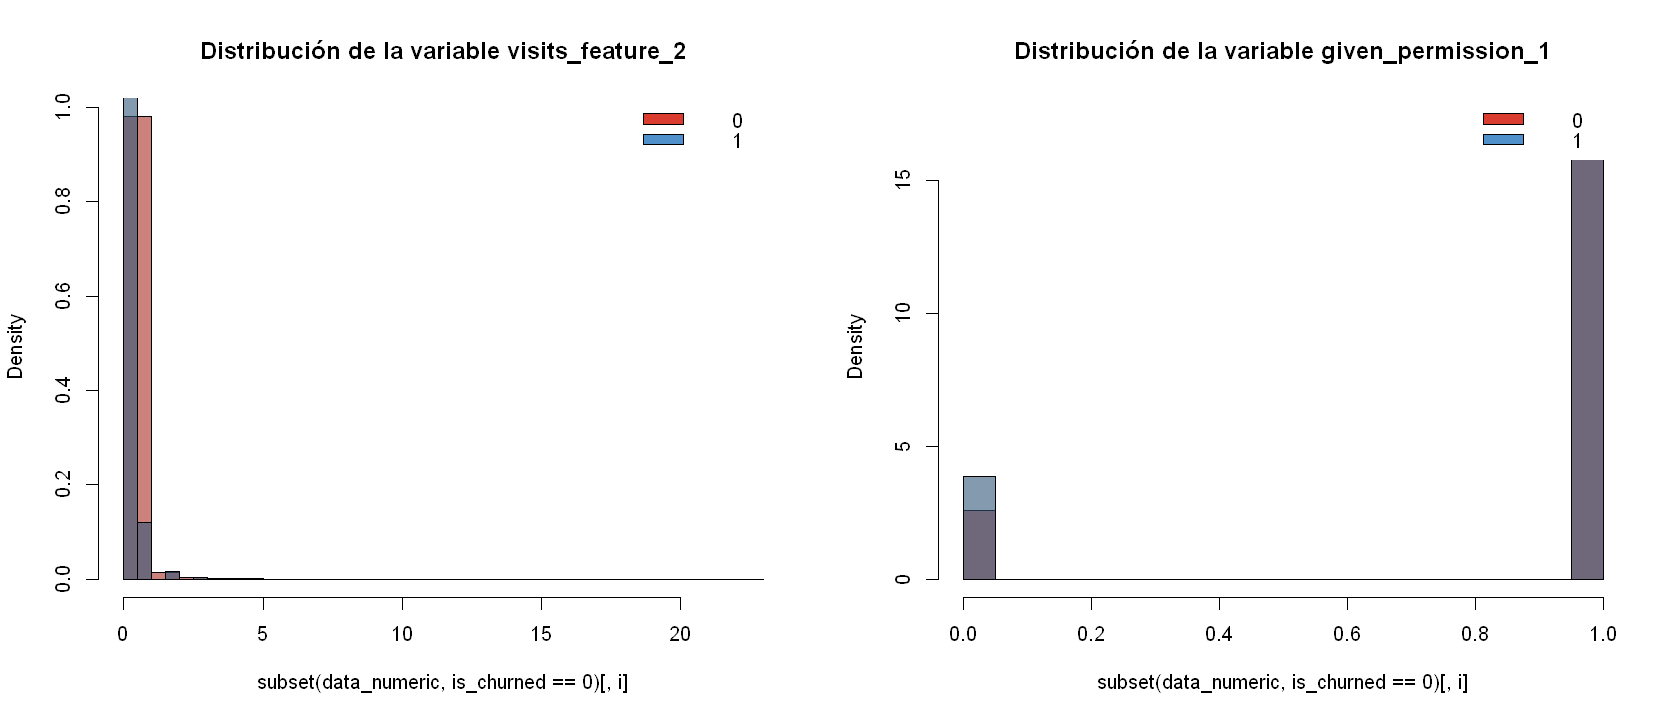

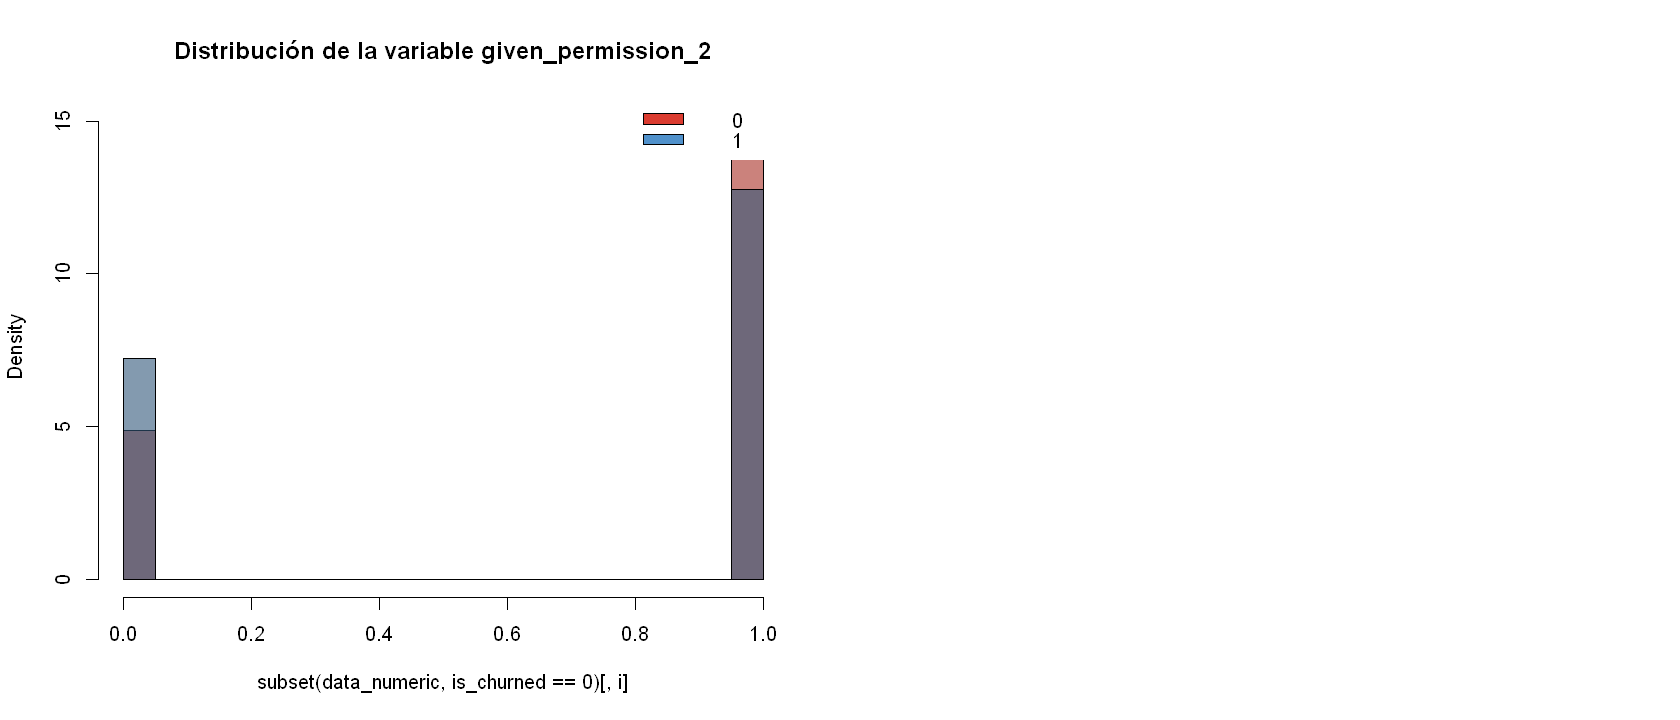

In [113]:
options(
  repr.plot.width = 14,
  repr.plot.height = 6
)

par(mfrow = c(1, 2))
for (i in 1:((length(colnames(data_numeric)))-2)) {

  hist(subset(data_numeric, is_churned == 0)[, i],
       col = rgb(0.66,0.18,0.14,0.6),
       main = paste0("Distribución de la variable ", colnames(data_numeric)[i]),
       freq = FALSE)
  hist(subset(data_numeric, is_churned == 1)[, i],
     col = rgb(0.187,0.339,0.474,0.6),
       add = TRUE,
       freq = FALSE)
       
  legend(x = "topright", legend = c(0, 1), fill = c('#db3c30', '#5091cb'), box.lty = "blank")
  if (i %% 2 == 0) {par(mfrow = c(1, 2))}
}

Vemos como las variables que más diferencia presentan son: payments_initiated, payments_completed, reward_purchase_count_first_7days, coins_redeemed_first_7days y visitrs_feature_2.
Como que reward_purchase_count_first_7days tiene muchos nulos, y vemos que tiene impacto en nuestra variable objetivo, vamos a anlizarla un poco más.

In [114]:
table(data_numeric$reward_purchase_count_first_7days)


    0     1     2     3     4     5     6     7     8     9    10    11    12 
23877 18955 16048  8660  5696  2673  1586   882   562   377   328   222   173 
   13    14    15    16    17    18    19    20    21    22    23    24    25 
  132   102    76    45    57    49    42    33    36    17    21    17    18 
   26    27    28    29    30    31    32    33    34    35    36    37    38 
   11     8    10    10     5     4    10     6     7     6     4     7    11 
   39    40    41    43    44    45    46    47    48    49    51    52    53 
    3     5     5     6     1     9     2     1     2     1     2     3     3 
   54    55    56    58    59    60    61    62    64    65    66    67    69 
    1     1     2     2     3     1     1     1     1     1     1     1     1 
   70    71    72    74    76    78    80    81    83    86    87    89    91 
    1     1     2     1     1     3     1     1     3     2     1     1     1 
   93    97   100   101   106   109   110   113   1

In [115]:
head(data_numeric)
tail(data_numeric)

,first_payment_amount,age,number_of_cards,payments_initiated,payments_failed,payments_completed,payments_completed_amount_first_7days,reward_purchase_count_first_7days,coins_redeemed_first_7days,visits_feature_1,visits_feature_2,given_permission_1,given_permission_2,user_id,is_churned
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,0,20,2,1,0,1,0,NA,0,3,0,1,0,269438,0
2,0,20,1,1,0,1,0,NA,0,0,0,1,0,139521,0
3,0,20,1,2,1,1,0,0,0,0,0,0,1,307352,0
4,0,20,2,4,1,2,322,2,20,0,0,1,1,456424,0
5,0,20,2,1,0,1,0,0,0,0,1,1,1,398779,0
6,0,20,0,1,0,1,0,0,0,0,0,1,1,136656,0


,first_payment_amount,age,number_of_cards,payments_initiated,payments_failed,payments_completed,payments_completed_amount_first_7days,reward_purchase_count_first_7days,coins_redeemed_first_7days,visits_feature_1,visits_feature_2,given_permission_1,given_permission_2,user_id,is_churned
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
104138,53,NA,1,2,0,2,63,3,23,0,1,1,1,4833,1
104139,55,NA,0,3,1,2,56,2,20,0,0,1,0,30036,1
104140,67,NA,1,1,0,1,67,2,53,0,0,1,0,377399,1
104141,67,NA,3,2,0,2,137,NA,0,0,0,1,1,8415,1
104142,83,NA,5,3,1,2,211,5,140,0,0,0,1,8056,1
104143,437,NA,1,1,0,1,437,0,0,0,0,1,1,109558,1


Debido a que los NA de la columna reward_purchase_count_first_7days se trata de un contador, y no tenemos muestras de que los NA esten realacionados con otros elementos, lo que haremos será transformar esos NA en 0, ya que si no aplica, quiere decir que tampoco ha obtenido recompensa.

In [116]:
data$reward_purchase_count_first_7days[is.na(data$reward_purchase_count_first_7days)] <- 0
head(data)

,device,first_payment_amount,age,city,number_of_cards,payments_initiated,payments_failed,payments_completed,payments_completed_amount_first_7days,reward_purchase_count_first_7days,coins_redeemed_first_7days,is_referral,visits_feature_1,visits_feature_2,given_permission_1,given_permission_2,user_id,is_churned
,<chr>,<int>,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<lgl>,<int>,<int>,<int>,<int>,<int>,<int>
1,samsung,0,20,Ahmedabad,2,1,0,1,0,0,0,FALSE,3,0,1,0,269438,0
2,xiaomi,0,20,Surat,1,1,0,1,0,0,0,TRUE,0,0,1,0,139521,0
3,xiaomi,0,20,Kullu,1,2,1,1,0,0,0,TRUE,0,0,0,1,307352,0
4,oneplus,0,20,Mumbai,2,4,1,2,322,2,20,FALSE,0,0,1,1,456424,0
5,apple,0,20,Pune,2,1,0,1,0,0,0,FALSE,0,1,1,1,398779,0
6,oppo,0,20,Ahmedabad,0,1,0,1,0,0,0,TRUE,0,0,1,1,136656,0


In [117]:
na_counts_per_column <- colSums(is.na(data))
print(na_counts_per_column)

                               device                  first_payment_amount 
                                    0                                     0 
                                  age                                  city 
                                  142                                     0 
                      number_of_cards                    payments_initiated 
                                  472                                   472 
                      payments_failed                    payments_completed 
                                  472                                   472 
payments_completed_amount_first_7days     reward_purchase_count_first_7days 
                                  472                                     0 
           coins_redeemed_first_7days                           is_referral 
                                  472                                     0 
                     visits_feature_1                      visits_feature_2 

In [118]:
df_sin_nulos <- data %>%
  filter(!is.na(number_of_cards) & !is.na(visits_feature_1))

df_sin_nulos$age <- NULL
na_counts_per_column <- colSums(is.na(df_sin_nulos))
print(na_counts_per_column)
table(df_sin_nulos$is_churned)

                               device                  first_payment_amount 
                                    0                                     0 
                                 city                       number_of_cards 
                                    0                                     0 
                   payments_initiated                       payments_failed 
                                    0                                     0 
                   payments_completed payments_completed_amount_first_7days 
                                    0                                     0 
    reward_purchase_count_first_7days            coins_redeemed_first_7days 
                                    0                                     0 
                          is_referral                      visits_feature_1 
                                    0                                     0 
                     visits_feature_2                    given_permission_1 


    0     1 
72618 28879 

Procedemos a quitar los outliers

In [119]:
quitar_outliers <- function(original,final) {

    for(col in names(original)) {
    
        if(is.numeric(original[[col]])) {
            Q1 <- quantile(original[[col]], 0.25, na.rm = TRUE)
            Q3 <- quantile(original[[col]], 0.75, na.rm = TRUE)
            IQR <- Q3 - Q1
            limite_inferior <- Q1 - 1.5 * IQR
            limite_superior <- Q3 + 1.5 * IQR

            # Filtrar los outliers
            final <- final[final[[col]] >= limite_inferior & final[[col]] <= limite_superior, ]
        }
  
    }

    return(final)
}

In [120]:

df_sin_outliers <- df_sin_nulos

In [121]:
#comentar para pribar sin outliers
df_sin_outliers <- quitar_outliers(df_sin_nulos,df_sin_outliers)

In [122]:
head(df_sin_outliers)

,device,first_payment_amount,city,number_of_cards,payments_initiated,payments_failed,payments_completed,payments_completed_amount_first_7days,reward_purchase_count_first_7days,coins_redeemed_first_7days,is_referral,visits_feature_1,visits_feature_2,given_permission_1,given_permission_2,user_id,is_churned
,<chr>,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<lgl>,<int>,<int>,<int>,<int>,<int>,<int>
2,xiaomi,0,Surat,1,1,0,1,0,0,0,TRUE,0,0,1,0,139521,0
6,oppo,0,Ahmedabad,0,1,0,1,0,0,0,TRUE,0,0,1,1,136656,0
10,samsung,0,Hyderabad,0,1,0,1,0,0,0,TRUE,0,0,1,1,251202,0
13,sony,0,Bangalore,2,2,0,2,83,0,0,FALSE,0,0,1,1,358202,0
17,xiaomi,2,Mumbai,1,2,0,2,7,0,0,FALSE,0,0,1,1,4083,0
19,xiaomi,2,Bangalore,0,1,0,1,2,0,0,TRUE,0,0,1,1,84190,0


In [123]:
dif <-max(table(df_sin_outliers$is_churned)) - min(table(df_sin_outliers$is_churned))
dif

[1] 15662

In [124]:
set.seed(123) # Establece la semilla aleatoria

indices <- which(df_sin_outliers$is_churned == 0)
indices_a_eliminar <- sample(indices, dif)
dfnum <- df_sin_outliers[-indices_a_eliminar, ]
table(dfnum$is_churned)


    0     1 
15944 15944 

Ahora mismo, tenemos nuestro dataset sin outliers, y limpio de nulos, vamos a volver a graficarlos de nuevo.

In [125]:
str(dfnum)
summary(dfnum)

data_numeric = dfnum %>%
  select_if(is.numeric)


'data.frame':	31888 obs. of  17 variables:
 $ device                               : chr  "xiaomi" "samsung" "xiaomi" "apple" ...
 $ first_payment_amount                 : int  0 0 2 3 3 6 7 13 13 14 ...
 $ city                                 : chr  "Surat" "Hyderabad" "Bangalore" "Bangalore" ...
 $ number_of_cards                      : int  1 0 0 1 0 0 2 1 2 1 ...
 $ payments_initiated                   : int  1 1 1 1 1 4 1 1 1 5 ...
 $ payments_failed                      : int  0 0 0 0 0 0 0 0 0 0 ...
 $ payments_completed                   : int  1 1 1 1 1 1 1 1 1 3 ...
 $ payments_completed_amount_first_7days: int  0 0 2 3 3 6 7 13 13 70 ...
 $ reward_purchase_count_first_7days    : num  0 0 0 1 0 0 0 1 1 3 ...
 $ coins_redeemed_first_7days           : int  0 0 0 3 0 0 0 3 3 23 ...
 $ is_referral                          : logi  TRUE TRUE TRUE TRUE TRUE TRUE ...
 $ visits_feature_1                     : int  0 0 0 0 0 0 0 0 0 0 ...
 $ visits_feature_2                     : int  

    device          first_payment_amount     city           number_of_cards
 Length:31888       Min.   : 0.00        Length:31888       Min.   :0.000  
 Class :character   1st Qu.: 1.00        Class :character   1st Qu.:1.000  
 Mode  :character   Median : 7.00        Mode  :character   Median :1.000  
                    Mean   :14.57                           Mean   :1.659  
                    3rd Qu.:22.00                           3rd Qu.:2.000  
                    Max.   :89.00                           Max.   :6.000  
 payments_initiated payments_failed  payments_completed
 Min.   :1.000      Min.   :0.0000   Min.   :1.000     
 1st Qu.:1.000      1st Qu.:0.0000   1st Qu.:1.000     
 Median :1.000      Median :0.0000   Median :1.000     
 Mean   :1.796      Mean   :0.2117   Mean   :1.227     
 3rd Qu.:2.000      3rd Qu.:0.0000   3rd Qu.:1.000     
 Max.   :6.000      Max.   :2.0000   Max.   :3.000     
 payments_completed_amount_first_7days reward_purchase_count_first_7days
 Mi

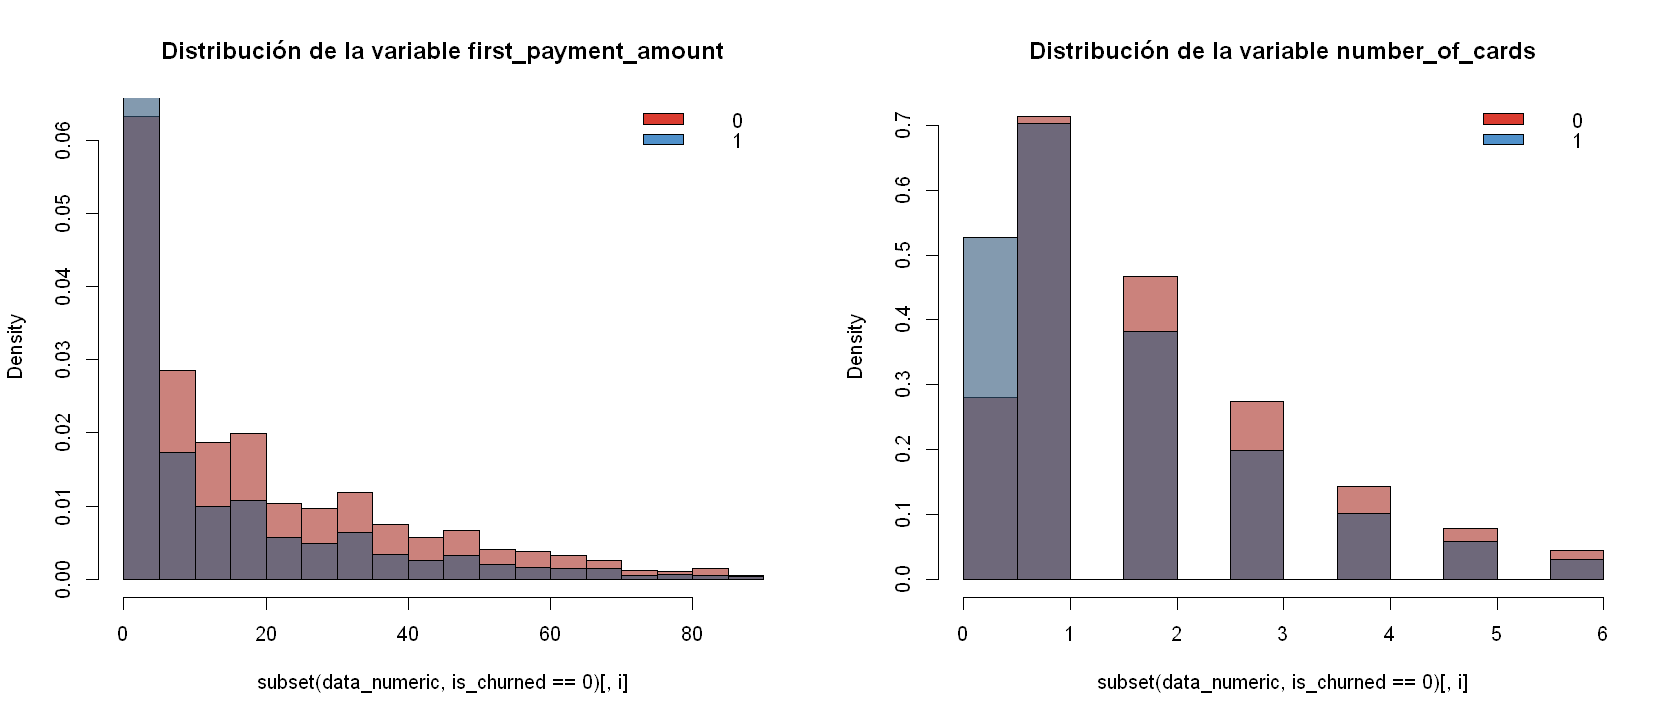

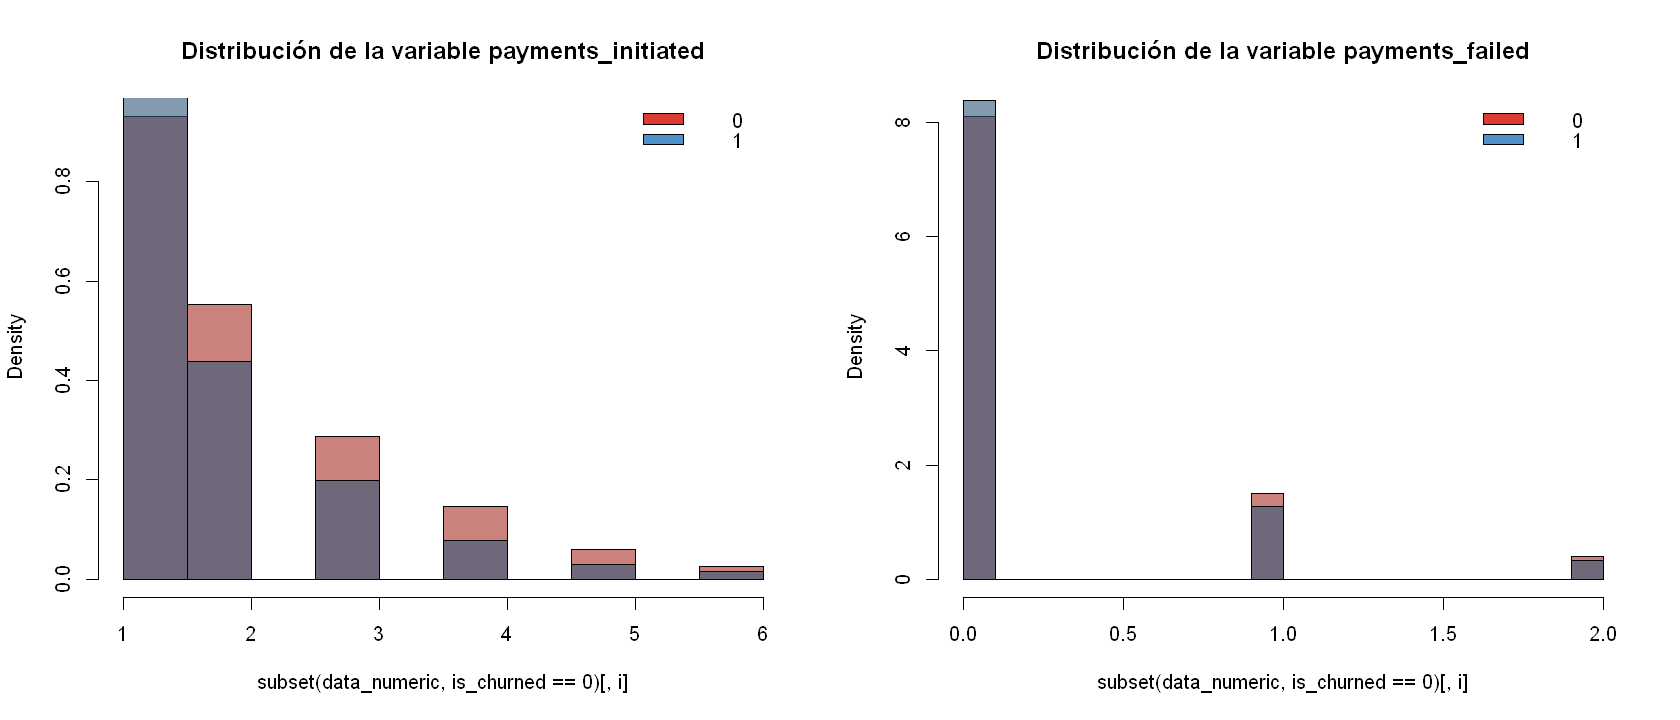

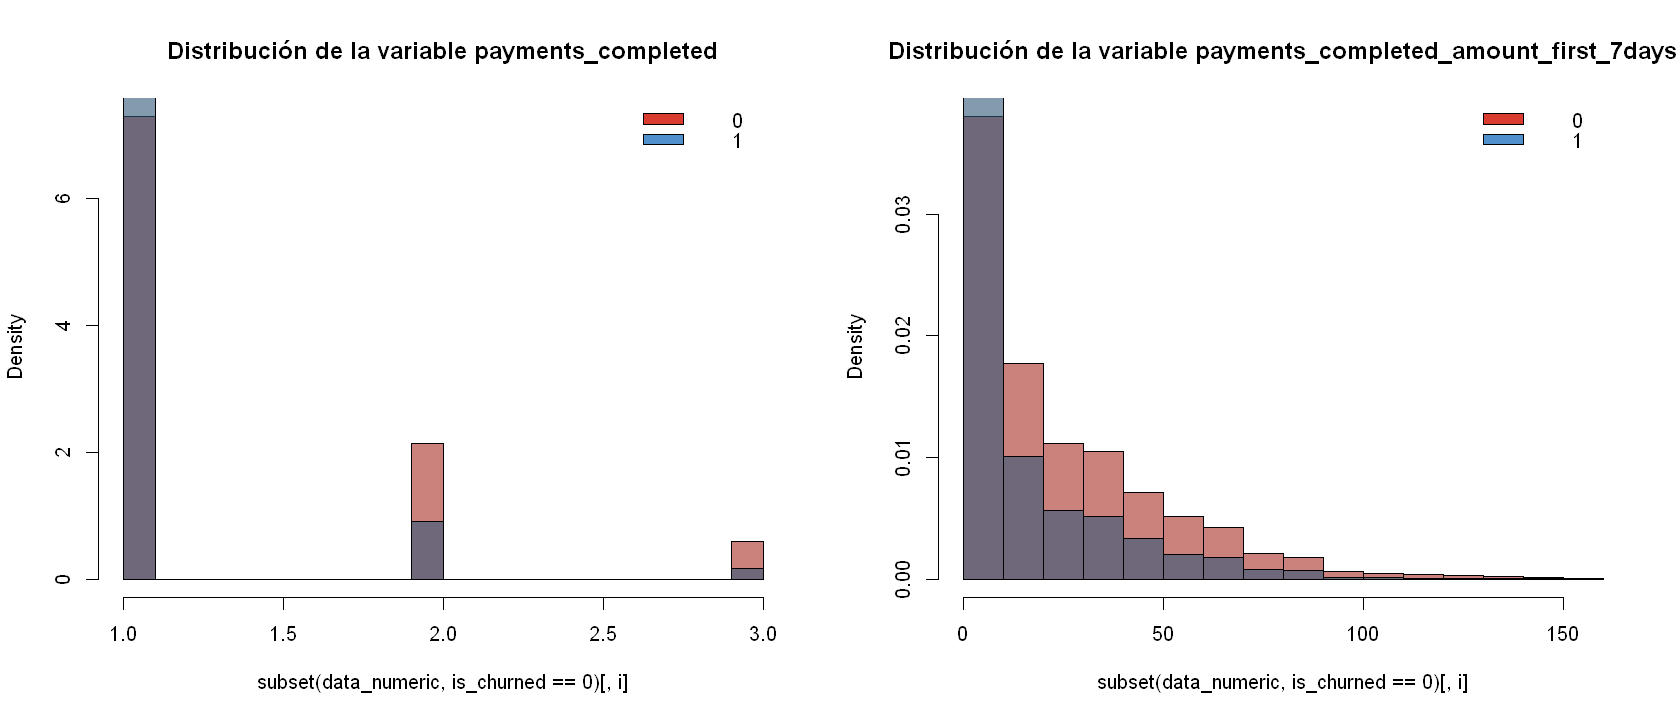

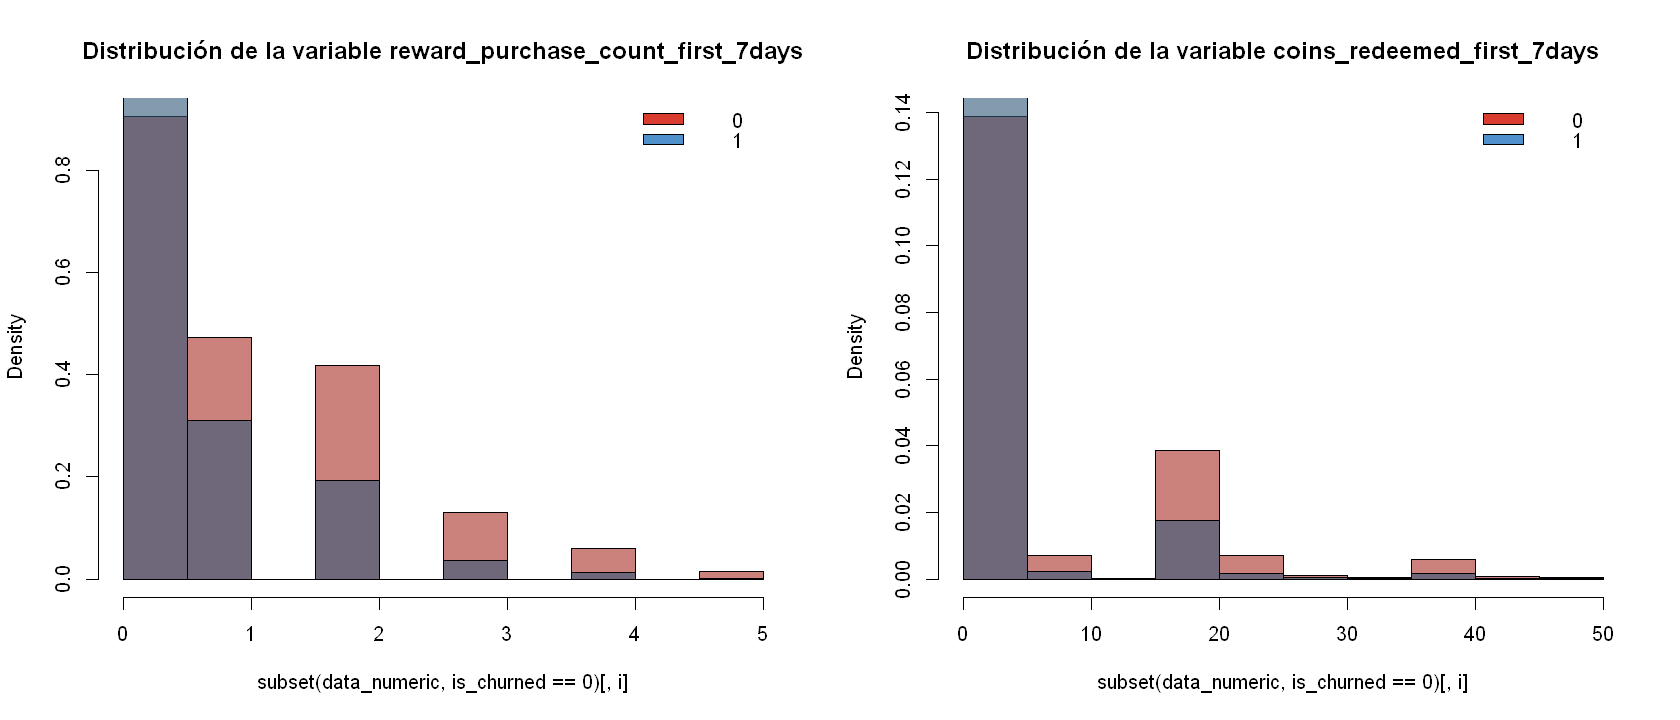

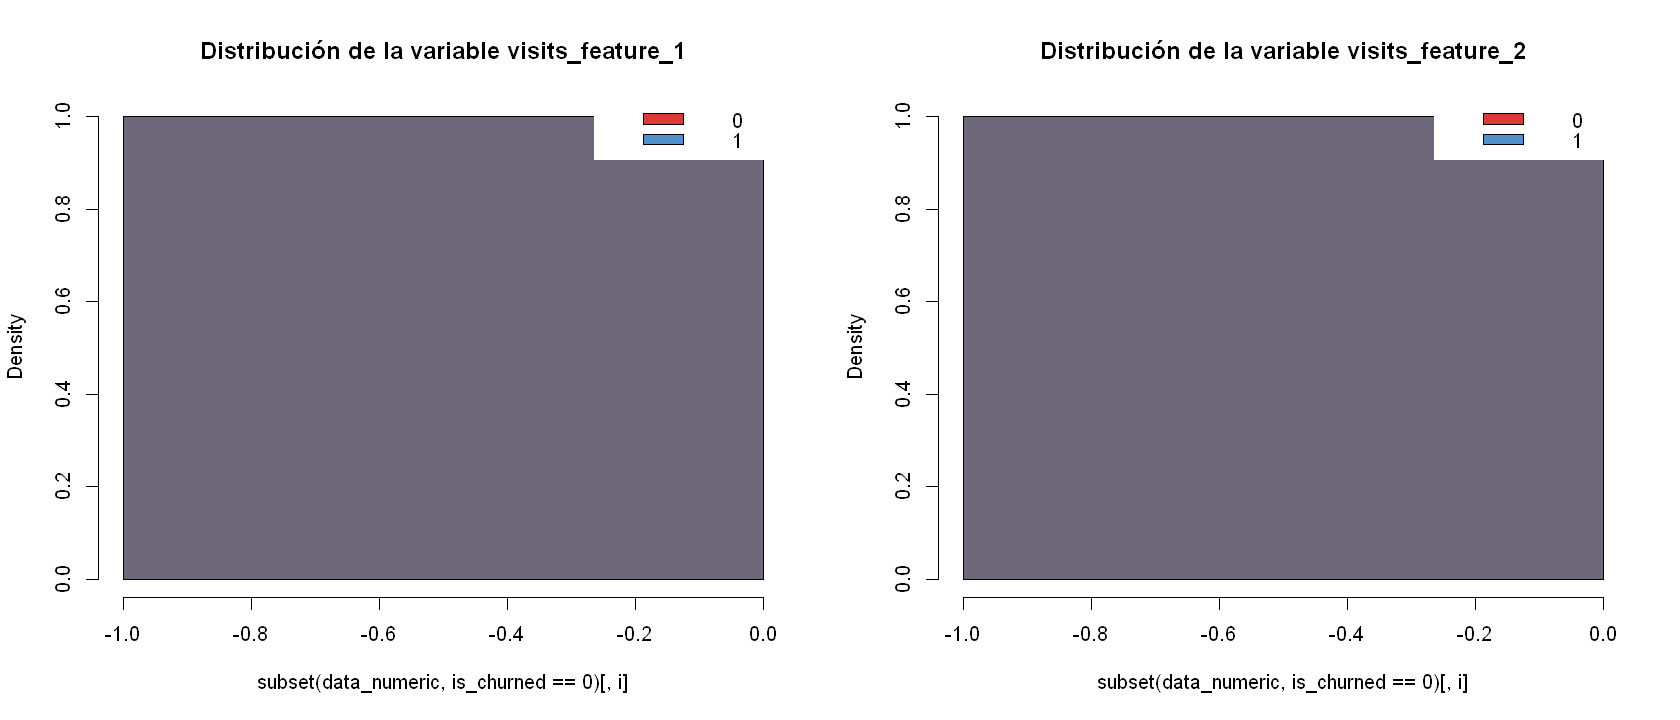

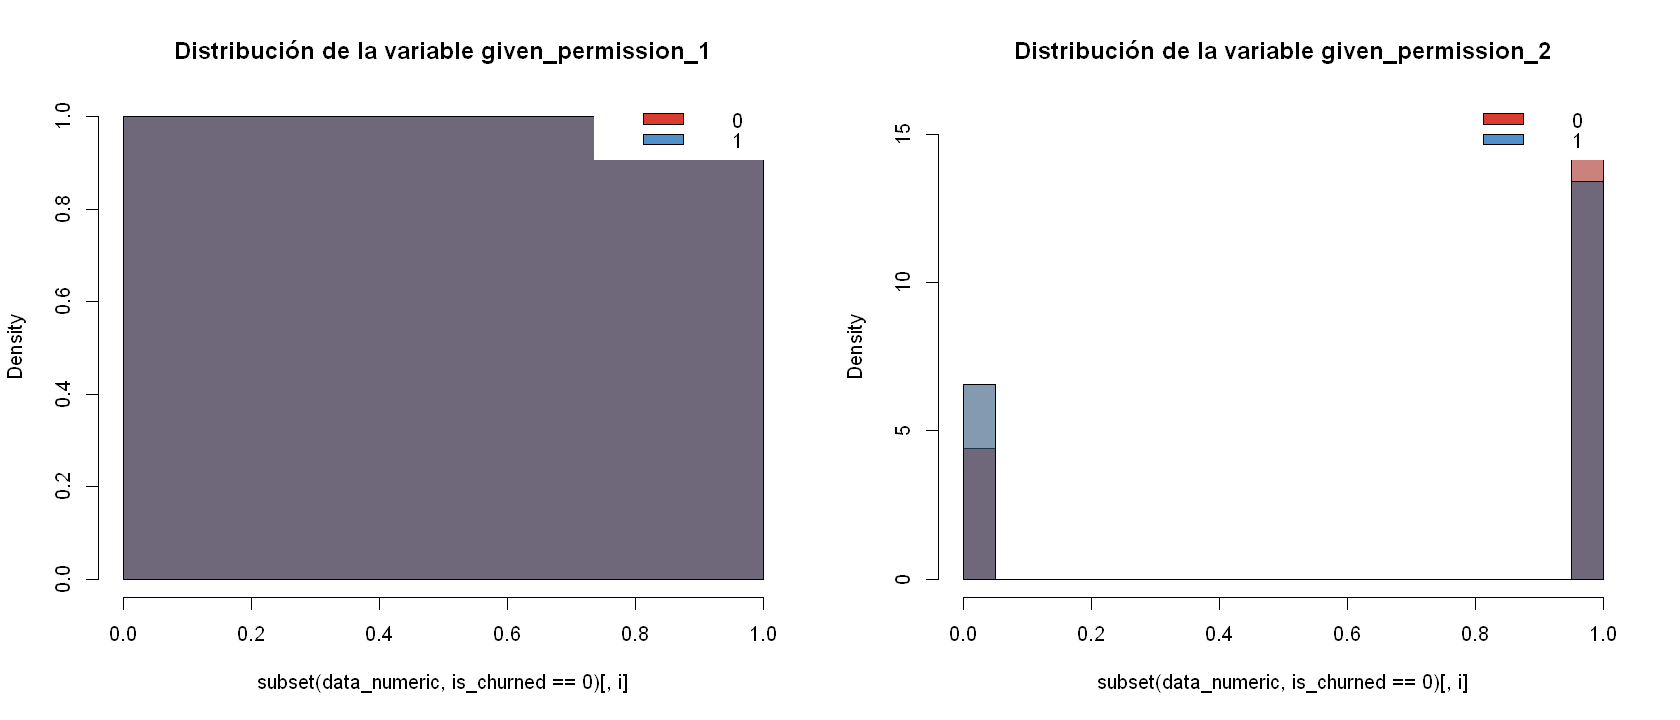

In [126]:
options(
  repr.plot.width = 14,
  repr.plot.height = 6
)

par(mfrow = c(1, 2))
for (i in 1:((length(colnames(data_numeric)))-2)) {

  hist(subset(data_numeric, is_churned == 0)[, i],
       col = rgb(0.66,0.18,0.14,0.6),
       main = paste0("Distribución de la variable ", colnames(data_numeric)[i]),
       freq = FALSE)
  hist(subset(data_numeric, is_churned == 1)[, i],
     col = rgb(0.187,0.339,0.474,0.6),
       add = TRUE,
       freq = FALSE)
       
  legend(x = "topright", legend = c(0, 1), fill = c('#db3c30', '#5091cb'), box.lty = "blank")
  if (i %% 2 == 0) {par(mfrow = c(1, 2))}
}

+vemos que depués de equilibrar nuestro dataset, es mejor si lo tenemos sin outliers, ya que nos dará la misma info pero sin extremos. Y vemos como podemos eliminar variables que no aportan información. (visits_feature_1, visits_feature_2, given_permission_1,given_permission_2) Y vemos como las demás si que tienen un valor diferenciador con la otra clase.

Así que nos quedaremos con las 8 primeras y la última.

In [127]:
dfnum$given_permission_1 <- NULL
dfnum$visits_feature_1 <- NULL
dfnum$visits_feature_2 <- NULL

df_sin_outliers$given_permission_1 <- NULL
df_sin_outliers$visits_feature_1 <- NULL
df_sin_outliers$visits_feature_2 <- NULL

In [138]:
data_numeric = dfnum %>%
  select_if(is.numeric)

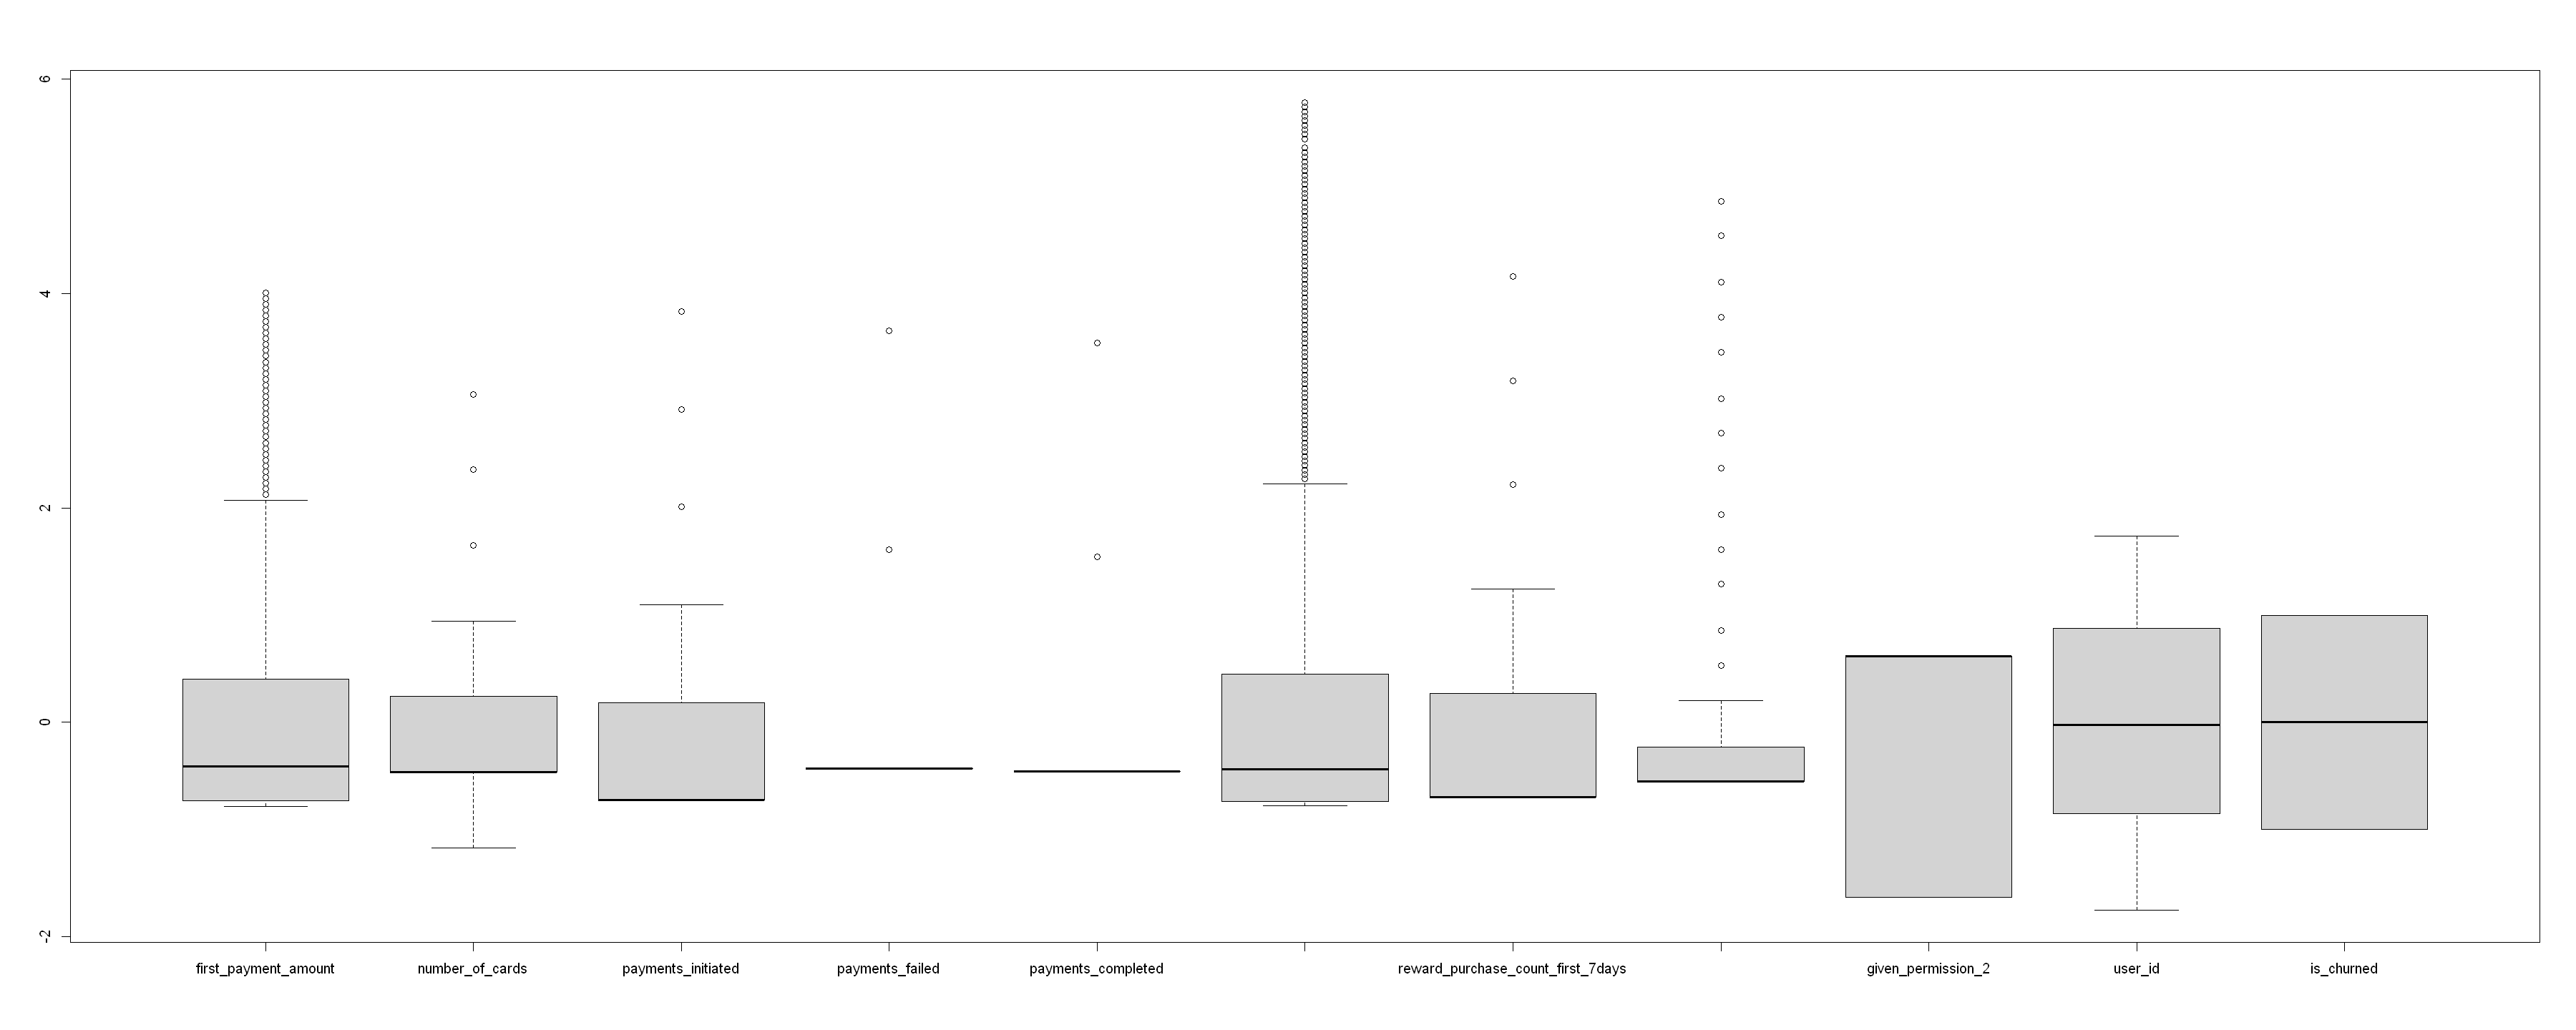

In [139]:
df_standard  <- as.data.frame(lapply(data_numeric, scale))
options(
  repr.plot.width = 30,  
  repr.plot.height = 12  
)
boxplot(df_standard)

Seguimos con unos pocos de outliers

## <font color='#3d59c6'>  SELECCIÓN DE VARIABLES </font>

Ahora veremos cuales son las variables más correlacionadas

In [155]:
dfnum$is_referral <- as.character(dfnum$is_referral)

In [ ]:
cuidad <- nchar(dfnum$city)

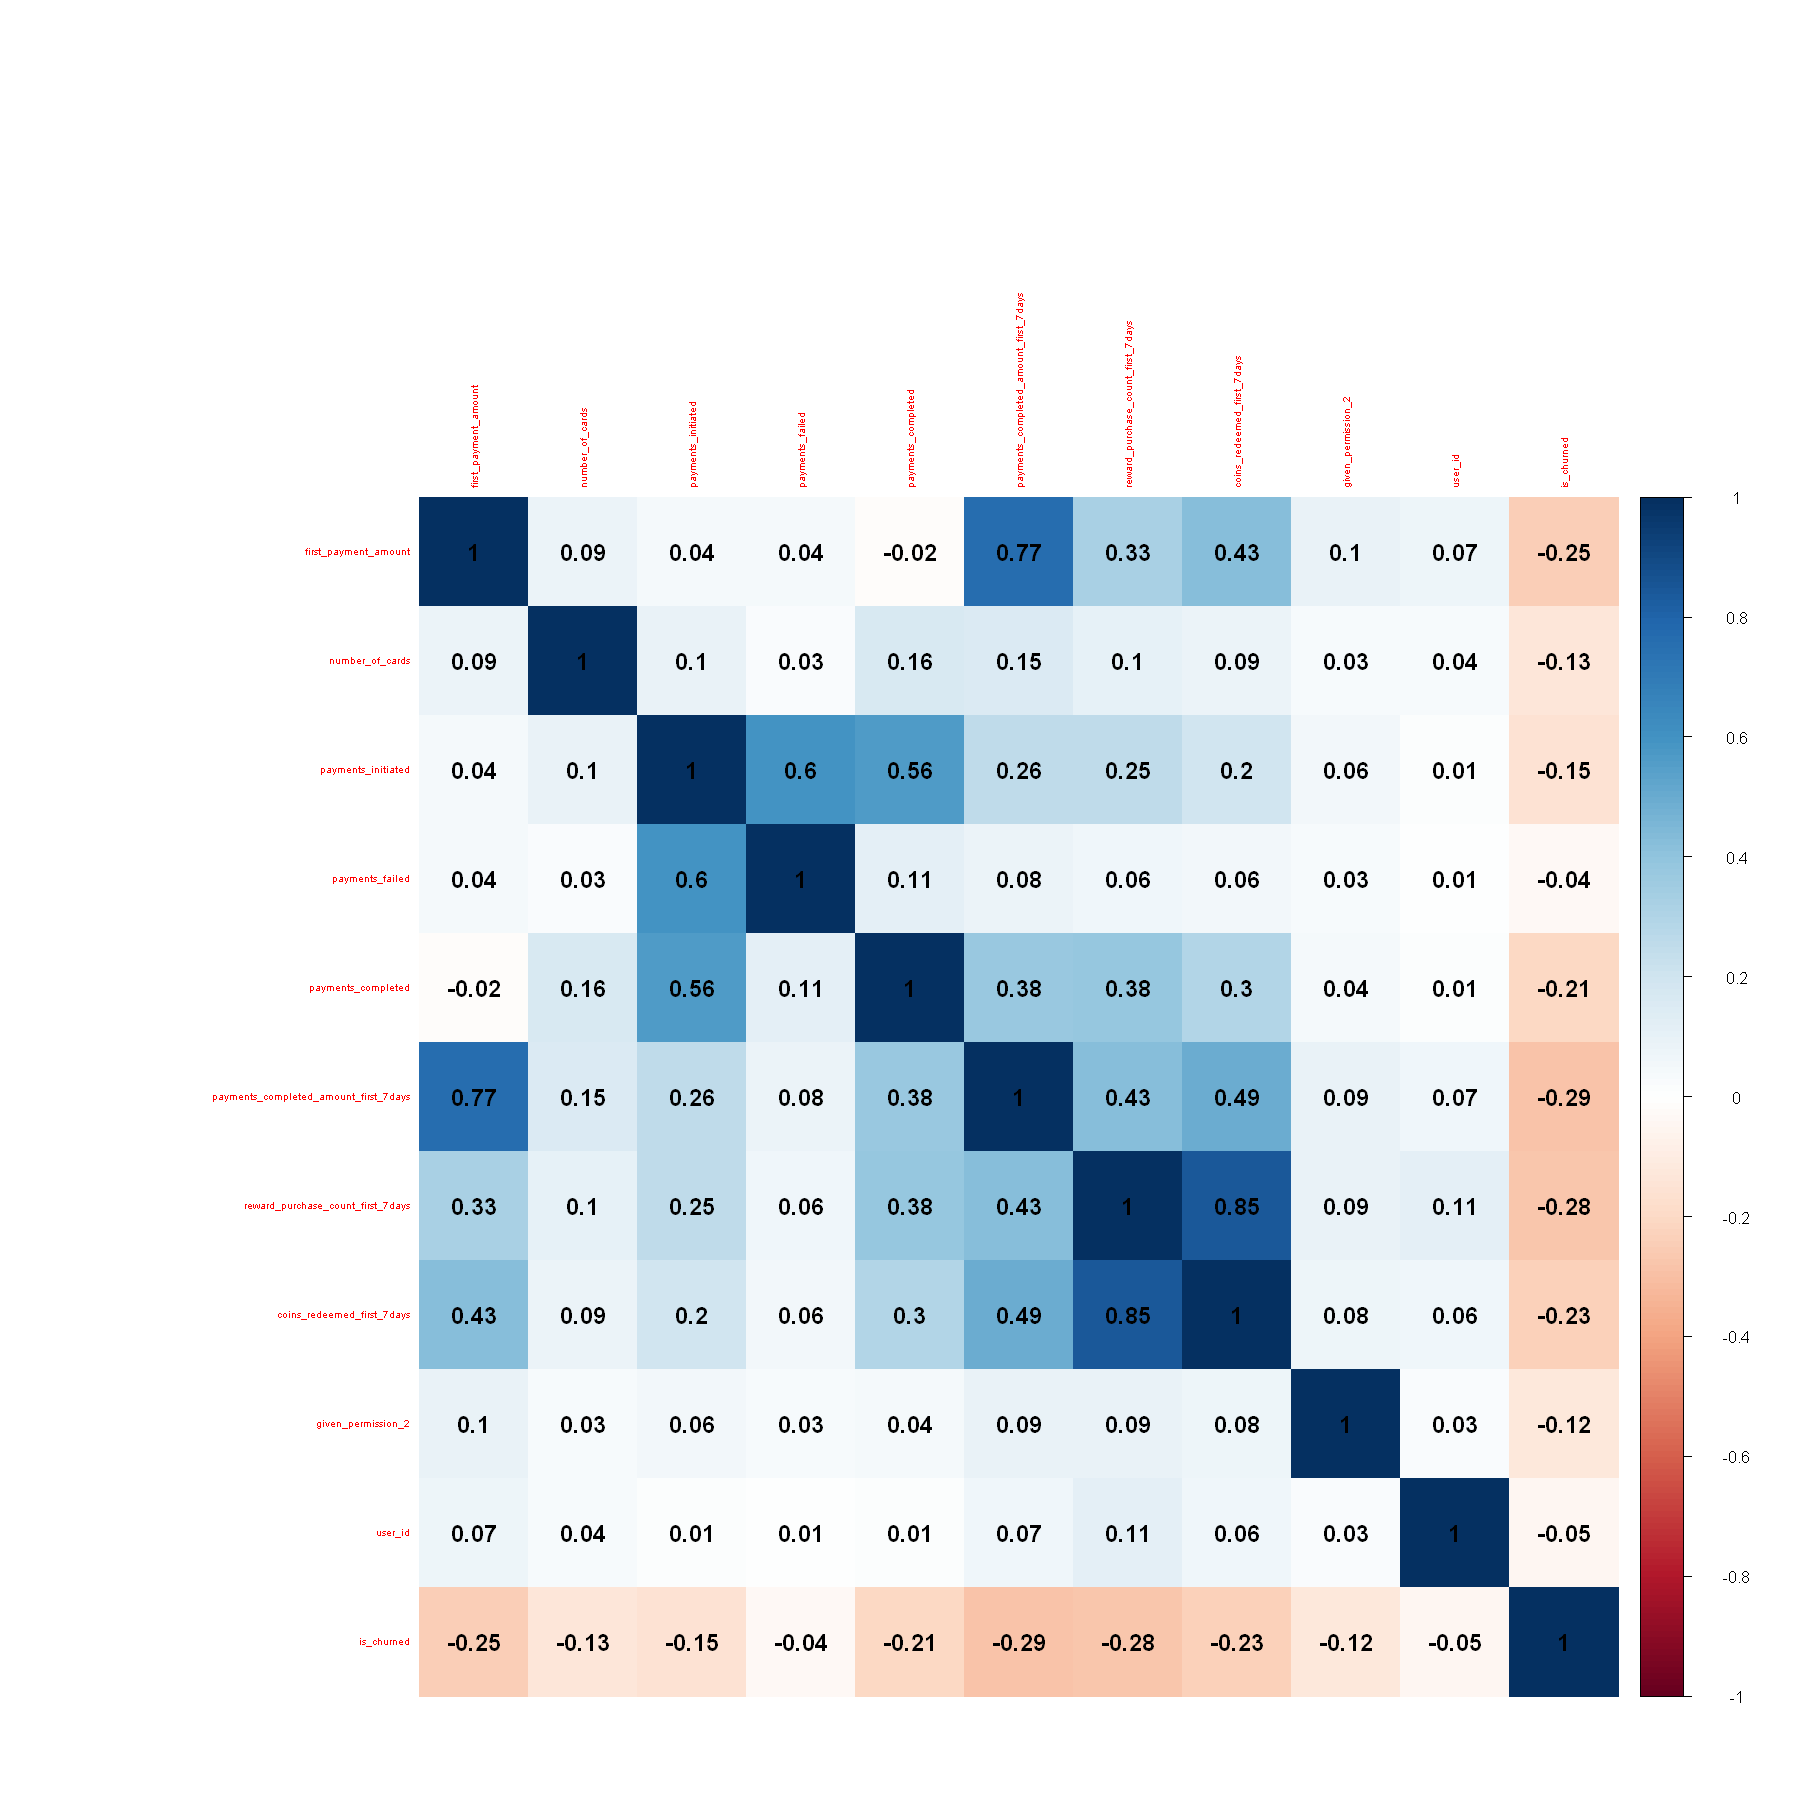

In [156]:
options(repr.plot.width=15, repr.plot.height=15)
corrplot(cor(data_numeric, use = "complete.obs"), method = "color",addCoef.col = "black", tl.cex = 0.5, number.cex = 1.2)

Realizamos un estudio de información mutua para ver cuales son las variables que mayor información aportan

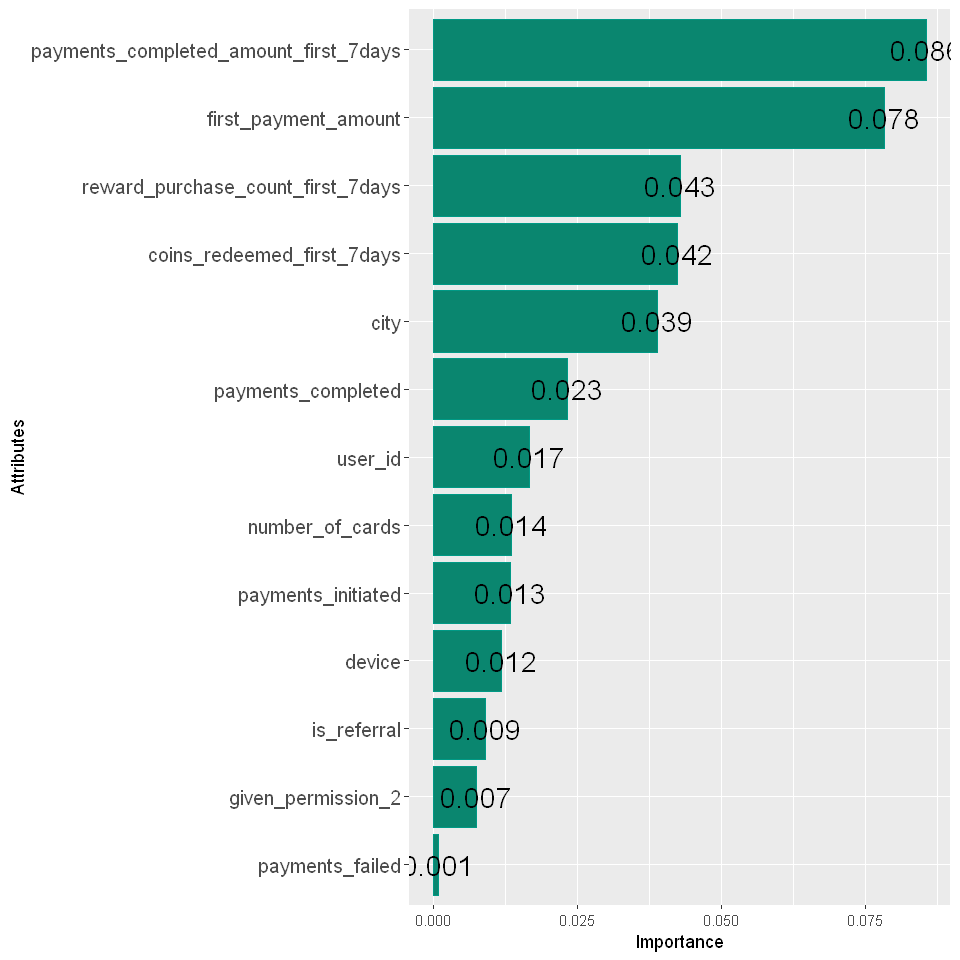

In [157]:
options(repr.plot.width = 8, repr.plot.height = 8 )
ig = information_gain(formula = is_churned ~ .
                     , data = dfnum
                     , type = 'infogain')

ggplot(ig, aes(x = reorder(attributes, +importance), y = importance)) +
 geom_bar(stat = "identity", fill = "#0a866f", color = "#009985") +
geom_text(aes(label =  round(importance, 3)),  color = "black",size = 6) +  # Agregar etiquetas de valores 
  coord_flip() +
  labs(x = "Attributes", y = "Importance")+
  theme(
    axis.text.y = element_text(size = 12))

Vemos como la variable que más información nos aporta es la de is_referral. (esto era porque no nos habíamos fijadso y estabamos tratando con la variable como boleana. Ahora vemos como no es la que maás aporta, si no que )

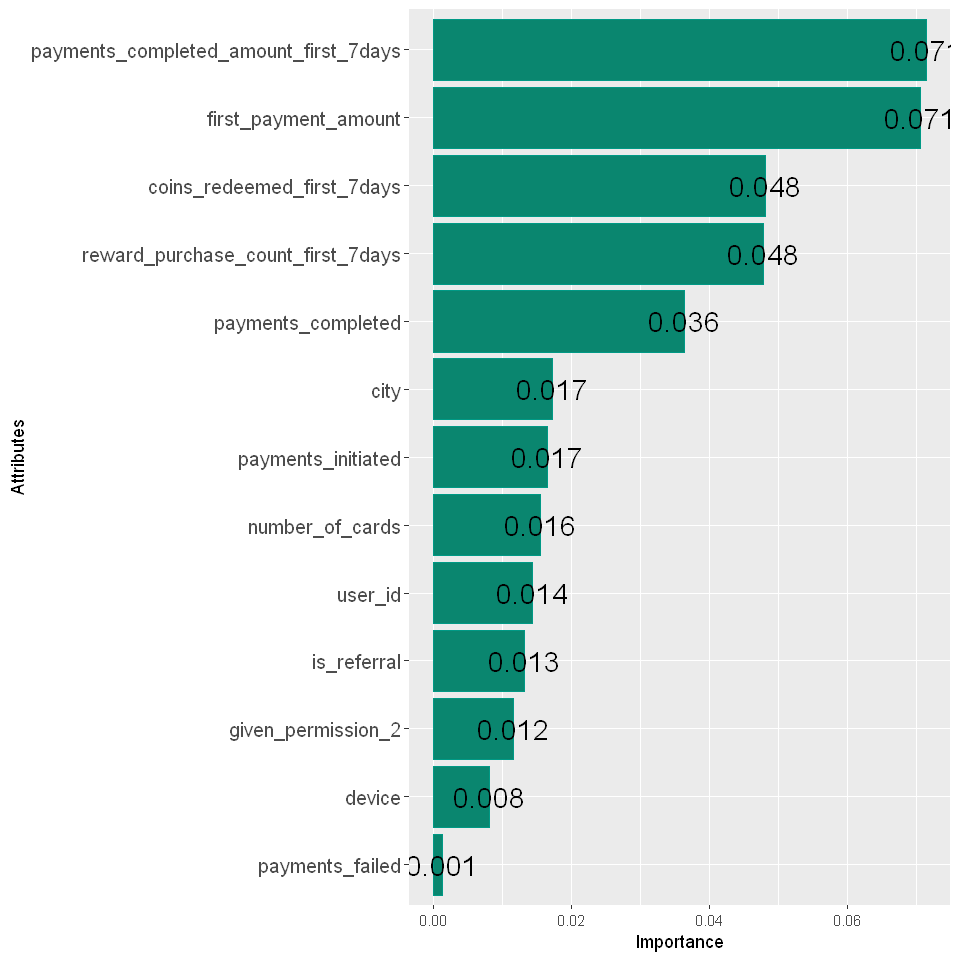

In [158]:
gr = information_gain(formula = is_churned ~ .
                     , data = dfnum
                     , type = 'symuncert')

ggplot(gr, aes(x = reorder(attributes, +importance), y = importance)) +
 geom_bar(stat = "identity", fill = "#0a866f", color = "#009985") +
geom_text(aes(label =  round(importance, 3)),  color = "black",size = 6) +  # Agregar etiquetas de valores 
  coord_flip() +
  labs(x = "Attributes", y = "Importance")+
  theme(
    axis.text.y = element_text(size = 12))

Efectivamente, is_referral es la que más información nos da. Esto quiere decir que la entropia conjunta es 0. 

In [150]:
head(dfnum)

,device,first_payment_amount,city,number_of_cards,payments_initiated,payments_failed,payments_completed,payments_completed_amount_first_7days,reward_purchase_count_first_7days,coins_redeemed_first_7days,is_referral,given_permission_2,user_id,is_churned
,<chr>,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<lgl>,<int>,<int>,<chr>
2,xiaomi,0,Surat,1,1,0,1,0,0,0,TRUE,0,139521,0
10,samsung,0,Hyderabad,0,1,0,1,0,0,0,TRUE,1,251202,0
19,xiaomi,2,Bangalore,0,1,0,1,2,0,0,TRUE,1,84190,0
24,apple,3,Bangalore,1,1,0,1,3,1,3,TRUE,1,75189,0
25,xiaomi,3,Ludhiana,0,1,0,1,3,0,0,TRUE,1,327966,0
30,oppo,6,Lucknow,0,4,0,1,6,0,0,TRUE,1,447429,0


In [151]:
dfnum$is_churned <- as.integer(dfnum$is_churned)


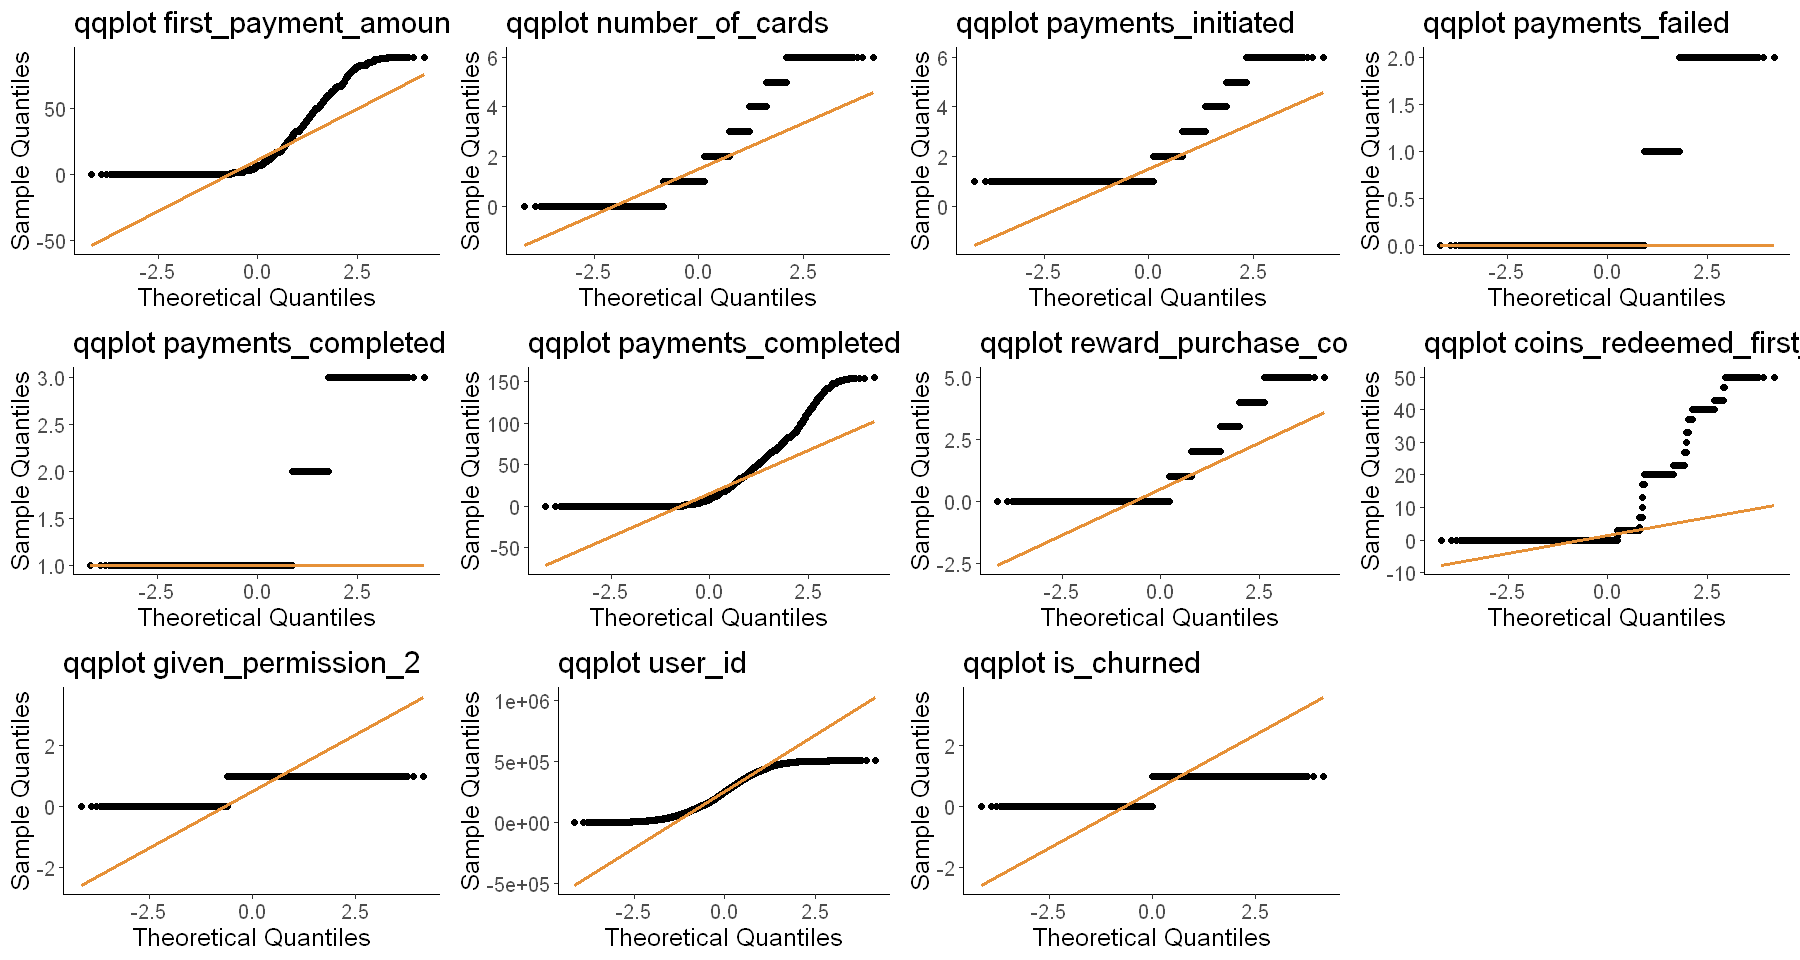

In [152]:
options(
  repr.plot.width = 15,  
  repr.plot.height = 8  
)
qq_plots = list()
var_data = colnames(data_numeric)

for (i in seq_along(var_data)) {
  variable = var_data[i]
  qq_plot = ggplot(data_numeric[!is.na(data_numeric[[variable]]), ],aes(sample = !!sym(variable))) +
    stat_qq() +
    stat_qq_line(color ='#e69138', lwd = 1) +
    labs(title = paste('qqplot', variable),
         x = 'Theoretical Quantiles',
         y = 'Sample Quantiles') +
    theme_classic() +
    theme(text = element_text(size = 15))
  qq_plots[[i]] = qq_plot
}

grid.arrange(grobs = qq_plots, ncol = 4, widths = rep(2, 4))

Ningun supuesto cumple normalidad.

In [153]:
#pasamos a variable categorica nuestra variable is_churned

dfnum$is_churned <- as.character(dfnum$is_churned)


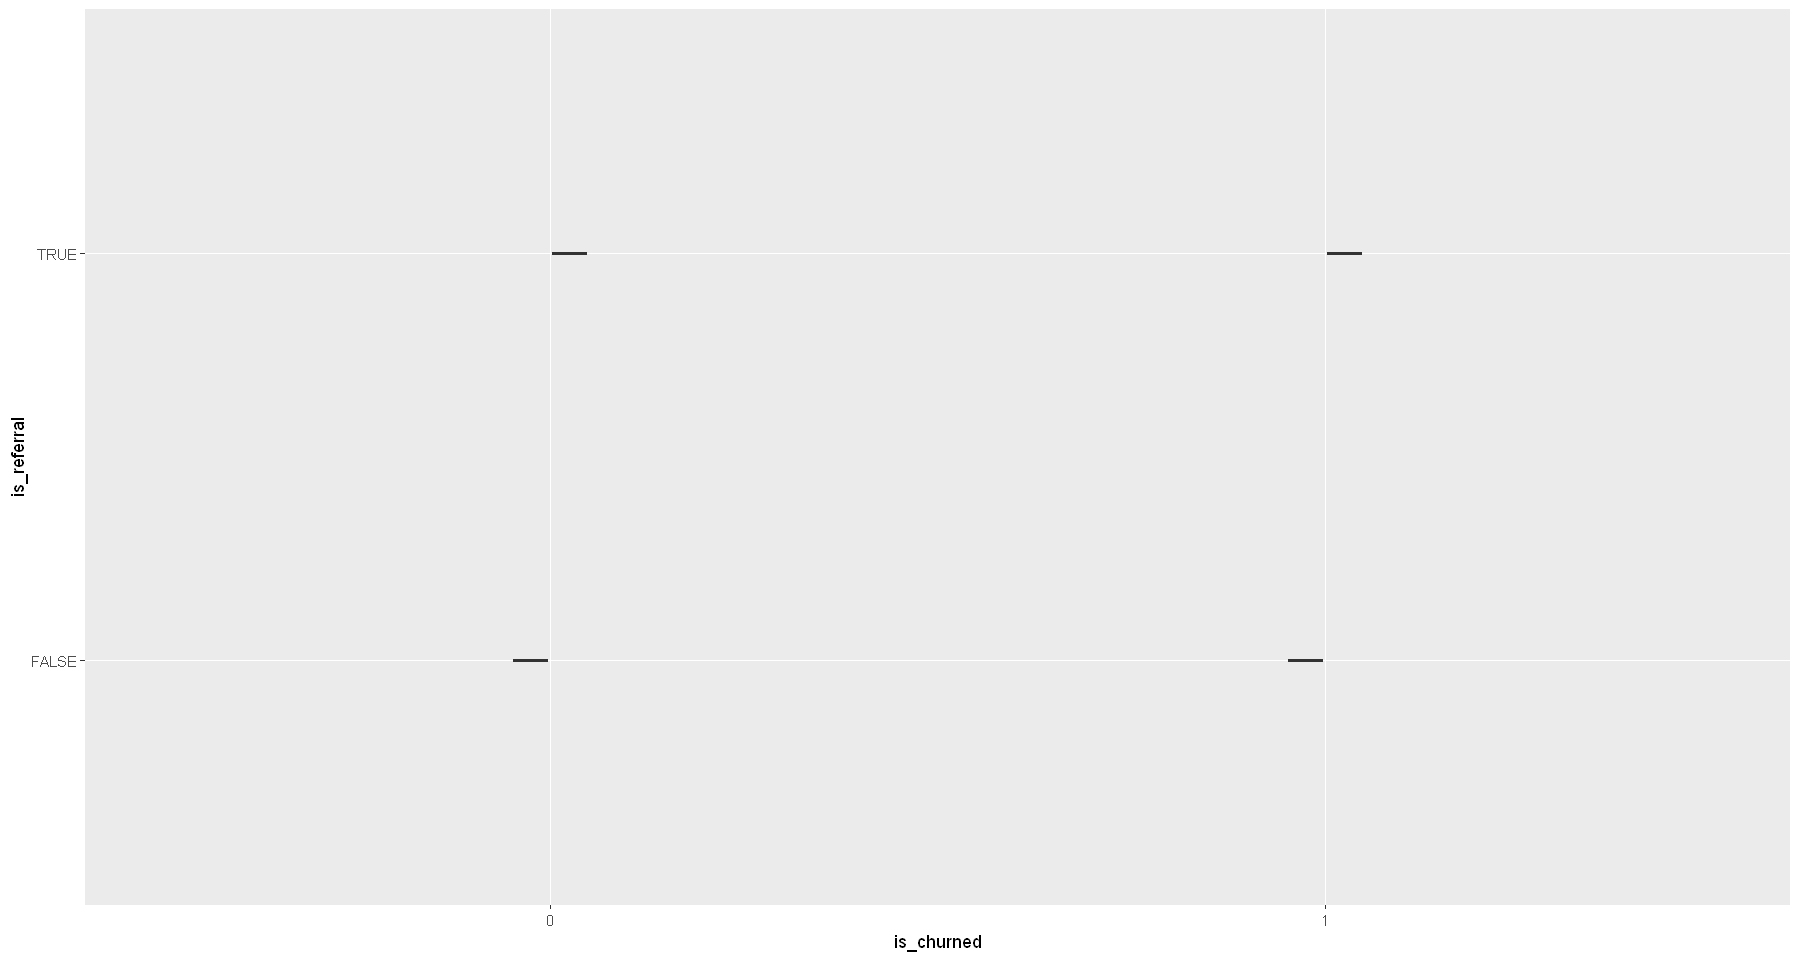

In [154]:
ggplot(dfnum, aes(is_churned, is_referral)) +
  geom_violin(color = NA, aes(fill = factor(is_churned))) +
  theme(legend.position = 'none') +
  geom_boxplot(width = 0.1) +
  scale_fill_manual(values = c('0' = '#3d85c6', '1' = '#e69138'))